In [51]:
from matplotlib import pyplot as plt
from matplotlib import colors as colors
import numpy as np

import sys 
sys.path.append('../')
import Utils.utils as util
from importlib import reload
reload(util)

from sklearn.linear_model import Lasso
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import normalize

np.set_printoptions(threshold=np.inf) #print full arrays
from sklearn import linear_model

In [52]:

def split_patch(patch):
    h = patch.shape[0]
    #Convert one patch into a column vector for training
    patch = patch.flatten()
    pixel_central = patch[(h*(h//2)+(h//2))*3:(h*(h//2)+(h//2))*3+3]
    patch_sans_central = np.delete(patch, range((h*(h//2)+(h//2))*3, (h*(h//2)+(h//2))*3+3))
    return np.array((patch_sans_central, pixel_central))
    
def convert_patch_into_vector(patch):
    #Convert one patch into a column vector for training
    #patch = patch.flatten()
    h = patch.shape[0]
    patch = np.reshape(patch, h*h*3)
    return np.array(patch)

def convert_vector_into_patch(vector, h):
    #Convert a one column vector into a patch of size h
    return vector.reshape((h,h,7))
    
def convert_patches_into_training_set(patches):
    #Convert a set of patches into a set of vectors
    return np.array(list(map(convert_patch_into_vector, patches))).T

def inpaint_image(noisy_image, dictionary, coord_noisy_pix, h):
    lassocv = linear_model.LassoCV()
    y, x = coord_noisy_pix[0]
    label = util.get_patch(x, y, h, noisy_image)
    label = list(convert_patch_into_vector(label))
    lassocv.fit(dictionary, label)
    alpha_ = lassocv.alpha_
    
    print("alpha = ", alpha_)
    
    i = 0
    nbiter  = len(coord_noisy_pix)
    for y, x in coord_noisy_pix:
        print( i, " / ", nbiter)
        i = i + 1
        
        print("Correction de x : ", x, " et y : ", y)
        label = util.get_patch(x, y, h, noisy_image)
        print("label = ")
        util.display_im(label)
        label = list(convert_patch_into_vector(label))

        print("--- lasso regression ---")
        
        model = Lasso(fit_intercept=True,alpha=alpha_,positive=True) #alpha=0.0001,tol=0.001
        
        dictionary_full = dictionary
        
        #todo enlever pixel central du dico
        
        
        model.fit(dictionary, label)
        
        res = model.predict(dictionary_full)
        newPixel = util.get_centered_pixel(res, h)
        
        print("nouveau pixel : ", newPixel)
        print("")
        noisy_image[x][y] = newPixel
        
        """
        coef = model.coef_.reshape((1,-1)) #poids
        sparse_coef_ = model.sparse_coef_
    
        print(sparse_coef_)
        print("coef shape : ", coef.shape)
        #print("sparse_coef_ shape : ", sparse_coef_.shape)
        print("nb patch not at zero: ", np.count_nonzero(sparse_coef_.toarray()), " / ", coef.shape[1])
        print("dictionary shape : ", dictionary.shape) 
        
        normalized_coefs = normalize(coef, norm='l1')
        #print("normalized_coefs shape = ", normalized_coefs)
        print("sum(normalized_coefs) = ", np.sum(normalized_coefs, axis=1))
        
        res = normalized_coefs*dictionary
        print("coef*dictionary shape= ",res.shape)
        
        resflat = np.sum(normalized_coefs*dictionary,axis=1)
        #print("resflat = ",resflat)
        
        print("sum(normalized_coefs*dictionary,axis=1) shape= ", resflat.shape)
        
        newPixel = util.get_centered_pixel(resflat, h)
        print("nouveau pixel : ", newPixel)
        print("")
        noisy_image[x][y] = newPixel
        """
        
        #util.display_im(noisy_image) #pour afficher toutes les images

    util.display_im(noisy_image)
    


taille de l'image :  (143, 128, 3)
128  ,  143
pixel  53   0 =( 53 ) is on border
pixel  126   98 =( 12670 ) is on border
pixel  42   141 =( 18090 ) is on border
pixel  127   63 =( 8191 ) is on border
pixel  124   140 =( 18044 ) is on border
pixel  127   44 =( 5759 ) is on border
pixel  119   140 =( 18039 ) is on border
pixel  125   20 =( 2685 ) is on border
pixel  44   140 =( 17964 ) is on border
pixel  1   58 =( 7425 ) is on border
pixel  125   63 =( 8189 ) is on border
pixel  0   49 =( 6272 ) is on border
pixel  127   10 =( 1407 ) is on border
patch =  [[[105 113  89]
  [132 133 137]
  [159 156 165]]

 [[124 131 113]
  [155 155 163]
  [ 90  88  99]]

 [[127 133 121]
  [175 175 183]
  [191 190 198]]]
centerpixel =  [155, 155, 163]
------------
patch =  [[[ 70  71  57]
  [112 112 102]
  [218 216 240]]

 [[ 81  81  69]
  [117 118 110]
  [198 196 218]]

 [[ 59  61  50]
  [ 83  85  74]
  [138 140 153]]]
centerpixel =  [117, 118, 110]
------------
patch =  [[[184 184 222]
  [225 230 252]


centerpixel =  [118, 94, 82]
------------
patch =  [[[118  91  84]
  [118  89  81]
  [117  88  80]]

 [[126  97  91]
  [109  80  76]
  [107  78  72]]

 [[ 94  65  59]
  [ 93  64  60]
  [ 85  57  53]]]
centerpixel =  [109, 80, 76]
------------
patch =  [[[97 70 63]
  [97 69 65]
  [90 65 60]]

 [[97 70 63]
  [89 62 55]
  [72 55 47]]

 [[69 44 39]
  [76 51 46]
  [77 60 52]]]
centerpixel =  [89, 62, 55]
------------
patch =  [[[82 59 53]
  [79 59 52]
  [74 55 48]]

 [[74 55 49]
  [76 55 52]
  [83 59 59]]

 [[69 50 44]
  [83 62 59]
  [62 41 40]]]
centerpixel =  [76, 55, 52]
------------
patch =  [[[71 54 47]
  [79 61 57]
  [86 68 68]]

 [[68 43 46]
  [84 62 64]
  [99 79 80]]

 [[89 67 69]
  [97 75 77]
  [80 60 61]]]
centerpixel =  [84, 62, 64]
------------
patch =  [[[90 71 73]
  [62 50 52]
  [63 47 48]]

 [[73 55 55]
  [65 45 44]
  [75 60 55]]

 [[90 70 69]
  [79 58 57]
  [85 67 63]]]
centerpixel =  [65, 45, 44]
------------
patch =  [[[ 91  67  67]
  [ 95  64  62]
  [105  65  65]]

 [[ 75

------------
patch =  [[[ 90  92  71]
  [111 109  96]
  [109 109 107]]

 [[ 91  92  74]
  [105 103  88]
  [103 100  95]]

 [[ 96  97  79]
  [ 97  95  80]
  [ 98  95  88]]]
centerpixel =  [105, 103, 88]
------------
patch =  [[[ 90  91  85]
  [ 81  82  74]
  [ 88  89  83]]

 [[ 85  85  77]
  [ 81  81  71]
  [ 87  86  81]]

 [[ 96  93  84]
  [103 100  91]
  [103 102  97]]]
centerpixel =  [81, 81, 71]
------------
patch =  [[[105 106 101]
  [108 108 106]
  [104 105  99]]

 [[106 106 104]
  [106 106 106]
  [109 109 109]]

 [[114 112 113]
  [116 115 120]
  [132 131 136]]]
centerpixel =  [106, 106, 106]
------------
patch =  [[[ 97 100  91]
  [103 105  92]
  [ 95  93  78]]

 [[106 108 103]
  [106 106  96]
  [ 97  95  80]]

 [[143 143 143]
  [118 115 106]
  [106 104  91]]]
centerpixel =  [106, 106, 96]
------------
patch =  [[[ 99  92  74]
  [109 100  83]
  [120 111  96]]

 [[ 93  88  69]
  [107  99  80]
  [122 113  98]]

 [[ 98  95  76]
  [110 103  84]
  [124 112  98]]]
centerpixel =  [107, 

  [219 221 246]]]
centerpixel =  [198, 196, 218]
------------
patch =  [[[218 216 240]
  [184 184 222]
  [225 230 252]]

 [[198 196 218]
  [189 189 223]
  [199 204 224]]

 [[138 140 153]
  [219 221 246]
  [187 193 209]]]
centerpixel =  [189, 189, 223]
------------
patch =  [[[184 184 222]
  [225 230 252]
  [224 227 242]]

 [[189 189 223]
  [199 204 224]
  [185 188 205]]

 [[219 221 246]
  [187 193 209]
  [175 178 193]]]
centerpixel =  [199, 204, 224]
------------
patch =  [[[225 230 252]
  [224 227 242]
  [240 244 255]]

 [[199 204 224]
  [185 188 205]
  [202 206 218]]

 [[187 193 209]
  [175 178 193]
  [194 198 210]]]
centerpixel =  [185, 188, 205]
------------
patch =  [[[224 227 242]
  [240 244 255]
  [237 241 250]]

 [[185 188 205]
  [202 206 218]
  [210 214 225]]

 [[175 178 193]
  [194 198 210]
  [143 147 158]]]
centerpixel =  [202, 206, 218]
------------
patch =  [[[240 244 255]
  [237 241 250]
  [182 189 197]]

 [[202 206 218]
  [210 214 225]
  [193 199 211]]

 [[194 198 210]
 

centerpixel =  [77, 88, 82]
------------
patch =  [[[ 68  79  63]
  [ 63  75  61]
  [ 58  70  56]]

 [[ 77  88  82]
  [ 94 105  99]
  [ 73  86  79]]

 [[130 138 151]
  [133 145 157]
  [ 95 108 114]]]
centerpixel =  [94, 105, 99]
------------
patch =  [[[ 63  75  61]
  [ 58  70  56]
  [ 76  91  72]]

 [[ 94 105  99]
  [ 73  86  79]
  [ 93 107  94]]

 [[133 145 157]
  [ 95 108 114]
  [ 75  85  84]]]
centerpixel =  [73, 86, 79]
------------
patch =  [[[ 58  70  56]
  [ 76  91  72]
  [ 96 112  86]]

 [[ 73  86  79]
  [ 93 107  94]
  [ 90 104  87]]

 [[ 95 108 114]
  [ 75  85  84]
  [ 82  85  76]]]
centerpixel =  [93, 107, 94]
------------
patch =  [[[ 76  91  72]
  [ 96 112  86]
  [ 66  80  55]]

 [[ 93 107  94]
  [ 90 104  87]
  [ 71  82  65]]

 [[ 75  85  84]
  [ 82  85  76]
  [ 78  74  62]]]
centerpixel =  [90, 104, 87]
------------
patch =  [[[ 96 112  86]
  [ 66  80  55]
  [ 76  88  68]]

 [[ 90 104  87]
  [ 71  82  65]
  [ 98 106  93]]

 [[ 82  85  76]
  [ 78  74  62]
  [ 88  81  71]

patch =  [[[198 205 224]
  [223 230 249]
  [201 206 225]]

 [[222 229 248]
  [178 185 204]
  [172 177 197]]

 [[194 201 220]
  [158 165 184]
  [184 189 209]]]
centerpixel =  [178, 185, 204]
------------
patch =  [[[223 230 249]
  [201 206 225]
  [189 194 213]]

 [[178 185 204]
  [172 177 197]
  [199 201 222]]

 [[158 165 184]
  [184 189 209]
  [208 210 233]]]
centerpixel =  [172, 177, 197]
------------
patch =  [[[201 206 225]
  [189 194 213]
  [220 226 248]]

 [[172 177 197]
  [199 201 222]
  [213 220 238]]

 [[184 189 209]
  [208 210 233]
  [190 198 211]]]
centerpixel =  [199, 201, 222]
------------
patch =  [[[189 194 213]
  [220 226 248]
  [223 228 250]]

 [[199 201 222]
  [213 220 238]
  [218 223 242]]

 [[208 210 233]
  [190 198 211]
  [149 155 169]]]
centerpixel =  [213, 220, 238]
------------
patch =  [[[220 226 248]
  [223 228 250]
  [207 209 234]]

 [[213 220 238]
  [218 223 242]
  [194 196 217]]

 [[190 198 211]
  [149 155 169]
  [181 184 199]]]
centerpixel =  [218, 223, 242

centerpixel =  [201, 202, 232]
------------
patch =  [[[225 228 255]
  [228 230 253]
  [184 187 196]]

 [[201 202 232]
  [206 207 227]
  [164 167 172]]

 [[211 212 233]
  [199 199 211]
  [126 128 123]]]
centerpixel =  [206, 207, 227]
------------
patch =  [[[228 230 253]
  [184 187 196]
  [105 107 104]]

 [[206 207 227]
  [164 167 172]
  [ 88  91  84]]

 [[199 199 211]
  [126 128 123]
  [ 94  98  81]]]
centerpixel =  [164, 167, 172]
------------
patch =  [[[184 187 196]
  [105 107 104]
  [165 166 186]]

 [[164 167 172]
  [ 88  91  84]
  [155 158 175]]

 [[126 128 123]
  [ 94  98  81]
  [134 138 147]]]
centerpixel =  [88, 91, 84]
------------
patch =  [[[105 107 104]
  [165 166 186]
  [187 188 218]]

 [[ 88  91  84]
  [155 158 175]
  [183 187 216]]

 [[ 94  98  81]
  [134 138 147]
  [153 157 182]]]
centerpixel =  [155, 158, 175]
------------
patch =  [[[165 166 186]
  [187 188 218]
  [208 213 242]]

 [[155 158 175]
  [183 187 216]
  [170 175 205]]

 [[134 138 147]
  [153 157 182]
  [171

patch =  [[[247 248 242]
  [198 201 192]
  [113 115 112]]

 [[215 221 217]
  [255 255 255]
  [132 142 131]]

 [[131 136 139]
  [ 98 104 104]
  [158 167 166]]]
centerpixel =  [255, 255, 255]
------------
patch =  [[[198 201 192]
  [113 115 112]
  [189 192 199]]

 [[255 255 255]
  [132 142 131]
  [230 240 229]]

 [[ 98 104 104]
  [158 167 166]
  [236 245 244]]]
centerpixel =  [132, 142, 131]
------------
patch =  [[[113 115 112]
  [189 192 199]
  [245 247 255]]

 [[132 142 131]
  [230 240 229]
  [247 255 251]]

 [[158 167 166]
  [236 245 244]
  [240 248 250]]]
centerpixel =  [230, 240, 229]
------------
patch =  [[[189 192 199]
  [245 247 255]
  [245 249 255]]

 [[230 240 229]
  [247 255 251]
  [239 249 248]]

 [[236 245 244]
  [240 248 250]
  [243 251 254]]]
centerpixel =  [247, 255, 251]
------------
patch =  [[[245 247 255]
  [245 249 255]
  [215 221 221]]

 [[247 255 251]
  [239 249 248]
  [224 234 236]]

 [[240 248 250]
  [243 251 254]
  [205 212 218]]]
centerpixel =  [239, 249, 248

  [ 94  66  62]]]
centerpixel =  [120, 91, 85]
------------
patch =  [[[125  96  90]
  [118  89  85]
  [113  83  81]]

 [[120  91  85]
  [107  78  74]
  [ 96  68  65]]

 [[109  80  74]
  [ 94  66  62]
  [ 88  63  59]]]
centerpixel =  [107, 78, 74]
------------
patch =  [[[118  89  85]
  [113  83  81]
  [106  78  77]]

 [[107  78  74]
  [ 96  68  65]
  [ 90  66  64]]

 [[ 94  66  62]
  [ 88  63  59]
  [ 88  67  64]]]
centerpixel =  [96, 68, 65]
------------
patch =  [[[113  83  81]
  [106  78  77]
  [ 91  65  66]]

 [[ 96  68  65]
  [ 90  66  64]
  [ 81  60  57]]

 [[ 88  63  59]
  [ 88  67  64]
  [ 79  61  57]]]
centerpixel =  [90, 66, 64]
------------
patch =  [[[106  78  77]
  [ 91  65  66]
  [ 85  61  61]]

 [[ 90  66  64]
  [ 81  60  57]
  [ 79  59  58]]

 [[ 88  67  64]
  [ 79  61  57]
  [ 74  59  54]]]
centerpixel =  [81, 60, 57]
------------
patch =  [[[91 65 66]
  [85 61 61]
  [71 53 51]]

 [[81 60 57]
  [79 59 58]
  [71 53 51]]

 [[79 61 57]
  [74 59 54]
  [79 59 58]]]
centerp

  [ 66  40  39]]]
centerpixel =  [79, 49, 47]
------------
patch =  [[[ 95  67  64]
  [ 86  65  60]
  [ 92  69  63]]

 [[ 79  49  47]
  [ 85  64  61]
  [ 84  59  52]]

 [[102  71  69]
  [ 66  40  39]
  [ 71  46  41]]]
centerpixel =  [85, 64, 61]
------------
patch =  [[[86 65 60]
  [92 69 63]
  [95 70 66]]

 [[85 64 61]
  [84 59 52]
  [90 62 58]]

 [[66 40 39]
  [71 46 41]
  [85 57 53]]]
centerpixel =  [84, 59, 52]
------------
patch =  [[[92 69 63]
  [95 70 66]
  [96 66 64]]

 [[84 59 52]
  [90 62 58]
  [87 57 55]]

 [[71 46 41]
  [85 57 53]
  [92 64 60]]]
centerpixel =  [90, 62, 58]
------------
patch =  [[[ 95  70  66]
  [ 96  66  64]
  [110  81  77]]

 [[ 90  62  58]
  [ 87  57  55]
  [ 98  70  67]]

 [[ 85  57  53]
  [ 92  64  60]
  [ 85  57  54]]]
centerpixel =  [87, 57, 55]
------------
patch =  [[[ 96  66  64]
  [110  81  77]
  [110  86  74]]

 [[ 87  57  55]
  [ 98  70  67]
  [111  88  80]]

 [[ 92  64  60]
  [ 85  57  54]
  [ 96  73  67]]]
centerpixel =  [98, 70, 67]
--------

patch =  [[[244 183 182]
  [239 176 171]
  [226 163 156]]

 [[244 184 184]
  [242 180 181]
  [241 179 180]]

 [[244 186 185]
  [243 185 184]
  [244 184 184]]]
centerpixel =  [242, 180, 181]
------------
patch =  [[[239 176 171]
  [226 163 156]
  [229 169 161]]

 [[242 180 181]
  [241 179 180]
  [237 175 176]]

 [[243 185 184]
  [244 184 184]
  [242 182 182]]]
centerpixel =  [241, 179, 180]
------------
patch =  [[[226 163 156]
  [229 169 161]
  [219 158 155]]

 [[241 179 180]
  [237 175 176]
  [234 172 173]]

 [[244 184 184]
  [242 182 182]
  [240 180 180]]]
centerpixel =  [237, 175, 176]
------------
patch =  [[[229 169 161]
  [219 158 155]
  [213 152 151]]

 [[237 175 176]
  [234 172 173]
  [228 166 167]]

 [[242 182 182]
  [240 180 180]
  [236 176 176]]]
centerpixel =  [234, 172, 173]
------------
patch =  [[[219 158 155]
  [213 152 151]
  [210 150 152]]

 [[234 172 173]
  [228 166 167]
  [219 157 158]]

 [[240 180 180]
  [236 176 176]
  [229 169 169]]]
centerpixel =  [228, 166, 167

patch =  [[[190 196 212]
  [185 193 212]
  [210 217 233]]

 [[187 194 204]
  [255 255 255]
  [206 214 227]]

 [[136 141 147]
  [161 169 182]
  [175 183 194]]]
centerpixel =  [255, 255, 255]
------------
patch =  [[[185 193 212]
  [210 217 233]
  [213 214 235]]

 [[255 255 255]
  [206 214 227]
  [204 205 223]]

 [[161 169 182]
  [175 183 194]
  [210 212 227]]]
centerpixel =  [206, 214, 227]
------------
patch =  [[[210 217 233]
  [213 214 235]
  [191 185 189]]

 [[206 214 227]
  [204 205 223]
  [160 154 156]]

 [[175 183 194]
  [210 212 227]
  [131 125 125]]]
centerpixel =  [204, 205, 223]
------------
patch =  [[[213 214 235]
  [191 185 189]
  [119 103  90]]

 [[204 205 223]
  [160 154 156]
  [125 109  94]]

 [[210 212 227]
  [131 125 125]
  [ 84  68  53]]]
centerpixel =  [160, 154, 156]
------------
patch =  [[[191 185 189]
  [119 103  90]
  [ 81  58  52]]

 [[160 154 156]
  [125 109  94]
  [ 74  51  45]]

 [[131 125 125]
  [ 84  68  53]
  [ 66  43  37]]]
centerpixel =  [125, 109, 94]

------------
patch =  [[[176 127 131]
  [191 153 152]
  [155 122 117]]

 [[144 100  99]
  [165 124 122]
  [178 143 139]]

 [[154 114 102]
  [179 131 131]
  [179 138 136]]]
centerpixel =  [165, 124, 122]
------------
patch =  [[[191 153 152]
  [155 122 117]
  [ 62  35  28]]

 [[165 124 122]
  [178 143 139]
  [ 68  39  33]]

 [[179 131 131]
  [179 138 136]
  [ 97  66  63]]]
centerpixel =  [178, 143, 139]
------------
patch =  [[[155 122 117]
  [ 62  35  28]
  [ 80  55  48]]

 [[178 143 139]
  [ 68  39  33]
  [ 78  53  46]]

 [[179 138 136]
  [ 97  66  63]
  [ 77  52  47]]]
centerpixel =  [68, 39, 33]
------------
patch =  [[[62 35 28]
  [80 55 48]
  [75 48 39]]

 [[68 39 33]
  [78 53 46]
  [77 52 45]]

 [[97 66 63]
  [77 52 47]
  [73 48 41]]]
centerpixel =  [78, 53, 46]
------------
patch =  [[[80 55 48]
  [75 48 39]
  [76 52 42]]

 [[78 53 46]
  [77 52 45]
  [60 36 26]]

 [[77 52 47]
  [73 48 41]
  [69 47 36]]]
centerpixel =  [77, 52, 45]
------------
patch =  [[[75 48 39]
  [76 52 42]


------------
patch =  [[[29 25 22]
  [34 23 21]
  [39 28 26]]

 [[32 27 24]
  [28 20 17]
  [37 32 28]]

 [[34 29 25]
  [25 22 17]
  [31 30 25]]]
centerpixel =  [28, 20, 17]
------------
patch =  [[[34 23 21]
  [39 28 26]
  [32 22 20]]

 [[28 20 17]
  [37 32 28]
  [30 25 21]]

 [[25 22 17]
  [31 30 25]
  [25 24 19]]]
centerpixel =  [37, 32, 28]
------------
patch =  [[[39 28 26]
  [32 22 20]
  [31 23 20]]

 [[37 32 28]
  [30 25 21]
  [25 22 17]]

 [[31 30 25]
  [25 24 19]
  [23 22 17]]]
centerpixel =  [30, 25, 21]
------------
patch =  [[[ 32  22  20]
  [ 31  23  20]
  [ 23  15  12]]

 [[ 30  25  21]
  [ 25  22  17]
  [ 18  15  10]]

 [[ 25  24  19]
  [ 23  22  17]
  [255 255 255]]]
centerpixel =  [25, 22, 17]
------------
patch =  [[[ 31  23  20]
  [ 23  15  12]
  [ 31  23  20]]

 [[ 25  22  17]
  [ 18  15  10]
  [ 33  28  24]]

 [[ 23  22  17]
  [255 255 255]
  [ 33  28  24]]]
centerpixel =  [18, 15, 10]
------------
patch =  [[[ 23  15  12]
  [ 31  23  20]
  [ 38  28  26]]

 [[ 18  1

------------
patch =  [[[197 201 212]
  [220 229 244]
  [213 222 239]]

 [[143 147 150]
  [135 145 147]
  [136 146 155]]

 [[109 113 114]
  [124 129 132]
  [149 157 160]]]
centerpixel =  [135, 145, 147]
------------
patch =  [[[220 229 244]
  [213 222 239]
  [209 215 229]]

 [[135 145 147]
  [136 146 155]
  [182 188 202]]

 [[124 129 132]
  [149 157 160]
  [173 178 182]]]
centerpixel =  [136, 146, 155]
------------
patch =  [[[213 222 239]
  [209 215 229]
  [232 235 244]]

 [[136 146 155]
  [182 188 202]
  [226 228 241]]

 [[149 157 160]
  [173 178 182]
  [216 220 223]]]
centerpixel =  [182, 188, 202]
------------
patch =  [[[209 215 229]
  [232 235 244]
  [137 140 145]]

 [[182 188 202]
  [226 228 241]
  [197 198 203]]

 [[173 178 182]
  [216 220 223]
  [221 221 223]]]
centerpixel =  [226, 228, 241]
------------
patch =  [[[232 235 244]
  [137 140 145]
  [146 149 154]]

 [[226 228 241]
  [197 198 203]
  [255 255 255]]

 [[216 220 223]
  [221 221 223]
  [134 132 133]]]
centerpixel =  [

centerpixel =  [99, 95, 68]
------------
patch =  [[[ 98  94  67]
  [104  98  74]
  [115 103  87]]

 [[ 99  95  68]
  [100  94  72]
  [ 97  88  73]]

 [[ 96  92  63]
  [ 95  87  66]
  [ 94  85  70]]]
centerpixel =  [100, 94, 72]
------------
patch =  [[[104  98  74]
  [115 103  87]
  [122 108  99]]

 [[100  94  72]
  [ 97  88  73]
  [106  96  86]]

 [[ 95  87  66]
  [ 94  85  70]
  [108  98  86]]]
centerpixel =  [97, 88, 73]
------------
patch =  [[[115 103  87]
  [122 108  99]
  [129 114 107]]

 [[ 97  88  73]
  [106  96  86]
  [134 121 112]]

 [[ 94  85  70]
  [108  98  86]
  [131 122 107]]]
centerpixel =  [106, 96, 86]
------------
patch =  [[[122 108  99]
  [129 114 107]
  [110  76  74]]

 [[106  96  86]
  [134 121 112]
  [114  83  80]]

 [[108  98  86]
  [131 122 107]
  [119  91  88]]]
centerpixel =  [134, 121, 112]
------------
patch =  [[[129 114 107]
  [110  76  74]
  [ 98  68  60]]

 [[134 121 112]
  [114  83  80]
  [103  74  66]]

 [[131 122 107]
  [119  91  88]
  [107  80  7

patch =  [[[110 109 104]
  [102  98  87]
  [ 94  92  80]]

 [[111 110 105]
  [119 112 104]
  [104 100  91]]

 [[107 104  99]
  [ 96  89  81]
  [ 82  78  69]]]
centerpixel =  [119, 112, 104]
------------
patch =  [[[102  98  87]
  [ 94  92  80]
  [ 89  89  77]]

 [[119 112 104]
  [104 100  91]
  [102  99  90]]

 [[ 96  89  81]
  [ 82  78  69]
  [ 90  87  80]]]
centerpixel =  [104, 100, 91]
------------
patch =  [[[ 94  92  80]
  [ 89  89  77]
  [ 87  89  76]]

 [[104 100  91]
  [102  99  90]
  [ 96  96  86]]

 [[ 82  78  69]
  [ 90  87  80]
  [ 91  91  83]]]
centerpixel =  [102, 99, 90]
------------
patch =  [[[ 89  89  77]
  [ 87  89  76]
  [ 93  95  84]]

 [[102  99  90]
  [ 96  96  86]
  [102 104  93]]

 [[ 90  87  80]
  [ 91  91  83]
  [103 104  96]]]
centerpixel =  [96, 96, 86]
------------
patch =  [[[ 87  89  76]
  [ 93  95  84]
  [ 94  95  87]]

 [[ 96  96  86]
  [102 104  93]
  [107 108 100]]

 [[ 91  91  83]
  [103 104  96]
  [114 115 107]]]
centerpixel =  [102, 104, 93]
-----

------------
patch =  [[[203 178 181]
  [236 230 232]
  [249 247 252]]

 [[202 186 187]
  [252 254 251]
  [236 247 243]]

 [[219 204 209]
  [253 254 255]
  [239 244 248]]]
centerpixel =  [252, 254, 251]
------------
patch =  [[[236 230 232]
  [249 247 252]
  [247 246 252]]

 [[252 254 251]
  [236 247 243]
  [224 232 235]]

 [[253 254 255]
  [239 244 248]
  [221 225 234]]]
centerpixel =  [236, 247, 243]
------------
patch =  [[[249 247 252]
  [247 246 252]
  [238 238 250]]

 [[236 247 243]
  [224 232 235]
  [228 234 246]]

 [[239 244 248]
  [221 225 234]
  [229 232 247]]]
centerpixel =  [224, 232, 235]
------------
patch =  [[[247 246 252]
  [238 238 250]
  [235 237 252]]

 [[224 232 235]
  [228 234 246]
  [227 233 249]]

 [[221 225 234]
  [229 232 247]
  [223 225 240]]]
centerpixel =  [228, 234, 246]
------------
patch =  [[[238 238 250]
  [235 237 252]
  [219 223 235]]

 [[228 234 246]
  [227 233 249]
  [210 216 228]]

 [[229 232 247]
  [223 225 240]
  [203 205 217]]]
centerpixel =  [

  [226 117 140]]]
centerpixel =  [243, 151, 166]
------------
patch =  [[[210 127 137]
  [213 133 144]
  [217 141 153]]

 [[243 151 166]
  [243 150 168]
  [236 148 164]]

 [[233 124 145]
  [226 117 140]
  [225 117 141]]]
centerpixel =  [243, 150, 168]
------------
patch =  [[[213 133 144]
  [217 141 153]
  [221 141 152]]

 [[243 150 168]
  [236 148 164]
  [241 150 165]]

 [[226 117 140]
  [225 117 141]
  [223 122 138]]]
centerpixel =  [236, 148, 164]
------------
patch =  [[[217 141 153]
  [221 141 152]
  [249 161 175]]

 [[236 148 164]
  [241 150 165]
  [243 144 162]]

 [[225 117 141]
  [223 122 138]
  [216 107 126]]]
centerpixel =  [241, 150, 165]
------------
patch =  [[[221 141 152]
  [249 161 175]
  [251 154 171]]

 [[241 150 165]
  [243 144 162]
  [234 131 150]]

 [[223 122 138]
  [216 107 126]
  [223 111 133]]]
centerpixel =  [243, 144, 162]
------------
patch =  [[[249 161 175]
  [251 154 171]
  [242 149 168]]

 [[243 144 162]
  [234 131 150]
  [219 126 145]]

 [[216 107 126]
 

patch =  [[[122 113  98]
  [131 119 107]
  [132 118 105]]

 [[124 112  98]
  [131 117 108]
  [129 116 107]]

 [[121 107  94]
  [127 112 105]
  [124 115 110]]]
centerpixel =  [131, 117, 108]
------------
patch =  [[[131 119 107]
  [132 118 105]
  [117 101  86]]

 [[131 117 108]
  [129 116 107]
  [121 111 101]]

 [[127 112 105]
  [124 115 110]
  [138 133 127]]]
centerpixel =  [129, 116, 107]
------------
patch =  [[[132 118 105]
  [117 101  86]
  [119  95  83]]

 [[129 116 107]
  [121 111 101]
  [121 101  92]]

 [[124 115 110]
  [138 133 127]
  [128 115 106]]]
centerpixel =  [121, 111, 101]
------------
patch =  [[[117 101  86]
  [119  95  83]
  [104  77  68]]

 [[121 111 101]
  [121 101  92]
  [145 123 110]]

 [[138 133 127]
  [128 115 106]
  [117 101  86]]]
centerpixel =  [121, 101, 92]
------------
patch =  [[[119  95  83]
  [104  77  68]
  [126  97  89]]

 [[121 101  92]
  [145 123 110]
  [131 108  94]]

 [[128 115 106]
  [117 101  86]
  [130 113  95]]]
centerpixel =  [145, 123, 110]

centerpixel =  [92, 95, 74]
------------
patch =  [[[ 78  82  59]
  [ 85  93  54]
  [100 107  73]]

 [[ 92  95  74]
  [ 89  97  60]
  [255 255 255]]

 [[ 95  98  81]
  [ 84  91  57]
  [ 89  97  58]]]
centerpixel =  [89, 97, 60]
------------
patch =  [[[ 85  93  54]
  [100 107  73]
  [107 110  89]]

 [[ 89  97  60]
  [255 255 255]
  [ 96 100  77]]

 [[ 84  91  57]
  [ 89  97  58]
  [ 97 101  74]]]
centerpixel =  [255, 255, 255]
------------
patch =  [[[100 107  73]
  [107 110  89]
  [ 84  85  69]]

 [[255 255 255]
  [ 96 100  77]
  [ 86  88  67]]

 [[ 89  97  58]
  [ 97 101  74]
  [ 88  90  68]]]
centerpixel =  [96, 100, 77]
------------
patch =  [[[107 110  89]
  [ 84  85  69]
  [ 81  81  55]]

 [[ 96 100  77]
  [ 86  88  67]
  [ 97  97  69]]

 [[ 97 101  74]
  [ 88  90  68]
  [ 97  97  69]]]
centerpixel =  [86, 88, 67]
------------
patch =  [[[ 84  85  69]
  [ 81  81  55]
  [102  98  86]]

 [[ 86  88  67]
  [ 97  97  69]
  [103 101  86]]

 [[ 88  90  68]
  [ 97  97  69]
  [105 104  84

patch =  [[[217 215 218]
  [204 204 202]
  [119 120 114]]

 [[229 232 239]
  [205 208 213]
  [102 107 110]]

 [[142 146 149]
  [ 73  78  81]
  [ 22  27  30]]]
centerpixel =  [205, 208, 213]
------------
patch =  [[[204 204 202]
  [119 120 114]
  [ 91  92  87]]

 [[205 208 213]
  [102 107 110]
  [ 58  62  65]]

 [[ 73  78  81]
  [ 22  27  30]
  [ 18  22  23]]]
centerpixel =  [102, 107, 110]
------------
patch =  [[[119 120 114]
  [ 91  92  87]
  [ 89  87  88]]

 [[102 107 110]
  [ 58  62  65]
  [ 16  19  24]]

 [[ 22  27  30]
  [ 18  22  23]
  [ 17  19  18]]]
centerpixel =  [58, 62, 65]
------------
patch =  [[[91 92 87]
  [89 87 88]
  [56 54 59]]

 [[58 62 65]
  [16 19 24]
  [14 17 26]]

 [[18 22 23]
  [17 19 18]
  [57 57 55]]]
centerpixel =  [16, 19, 24]
------------
patch =  [[[ 89  87  88]
  [ 56  54  59]
  [ 37  26  40]]

 [[ 16  19  24]
  [ 14  17  26]
  [ 61  48  58]]

 [[ 17  19  18]
  [ 57  57  55]
  [191 164 173]]]
centerpixel =  [14, 17, 26]
------------
patch =  [[[ 56  54  

------------
patch =  [[[101 107  69]
  [ 99 103  70]
  [113 111  88]]

 [[ 97 105  64]
  [ 97 101  66]
  [116 112  85]]

 [[ 99 108  65]
  [ 99 104  64]
  [119 116  85]]]
centerpixel =  [97, 101, 66]
------------
patch =  [[[ 99 103  70]
  [113 111  88]
  [139 132 116]]

 [[ 97 101  66]
  [116 112  85]
  [149 141 122]]

 [[ 99 104  64]
  [119 116  85]
  [161 150 128]]]
centerpixel =  [116, 112, 85]
------------
patch =  [[[113 111  88]
  [139 132 116]
  [144 131 122]]

 [[116 112  85]
  [149 141 122]
  [154 140 127]]

 [[119 116  85]
  [161 150 128]
  [172 157 138]]]
centerpixel =  [149, 141, 122]
------------
patch =  [[[139 132 116]
  [144 131 122]
  [143 130 122]]

 [[149 141 122]
  [154 140 127]
  [158 144 131]]

 [[161 150 128]
  [172 157 138]
  [182 166 150]]]
centerpixel =  [154, 140, 127]
------------
patch =  [[[144 131 122]
  [143 130 122]
  [141 128 119]]

 [[154 140 127]
  [158 144 131]
  [155 141 128]]

 [[172 157 138]
  [182 166 150]
  [179 164 145]]]
centerpixel =  [158

------------
patch =  [[[209 157 159]
  [204 154 155]
  [198 148 147]]

 [[204 151 157]
  [207 155 159]
  [199 147 149]]

 [[196 151 156]
  [202 156 159]
  [194 145 148]]]
centerpixel =  [207, 155, 159]
------------
patch =  [[[204 154 155]
  [198 148 147]
  [195 146 142]]

 [[207 155 159]
  [199 147 149]
  [196 146 145]]

 [[202 156 159]
  [194 145 148]
  [201 151 150]]]
centerpixel =  [199, 147, 149]
------------
patch =  [[[198 148 147]
  [195 146 142]
  [194 145 140]]

 [[199 147 149]
  [196 146 145]
  [191 142 138]]

 [[194 145 148]
  [201 151 150]
  [206 157 153]]]
centerpixel =  [196, 146, 145]
------------
patch =  [[[195 146 142]
  [194 145 140]
  [195 147 143]]

 [[196 146 145]
  [191 142 138]
  [186 138 134]]

 [[201 151 150]
  [206 157 153]
  [203 152 148]]]
centerpixel =  [191, 142, 138]
------------
patch =  [[[194 145 140]
  [195 147 143]
  [200 152 148]]

 [[191 142 138]
  [186 138 134]
  [192 147 141]]

 [[206 157 153]
  [203 152 148]
  [202 153 146]]]
centerpixel =  [

patch =  [[[29 24 47]
  [31 30 48]
  [33 37 49]]

 [[21 28 46]
  [34 37 52]
  [34 34 46]]

 [[24 31 49]
  [31 34 49]
  [30 30 42]]]
centerpixel =  [34, 37, 52]
------------
patch =  [[[31 30 48]
  [33 37 49]
  [23 35 49]]

 [[34 37 52]
  [34 34 46]
  [31 30 44]]

 [[31 34 49]
  [30 30 42]
  [29 28 42]]]
centerpixel =  [34, 34, 46]
------------
patch =  [[[33 37 49]
  [23 35 49]
  [27 33 49]]

 [[34 34 46]
  [31 30 44]
  [32 34 47]]

 [[30 30 42]
  [29 28 42]
  [31 33 46]]]
centerpixel =  [31, 30, 44]
------------
patch =  [[[23 35 49]
  [27 33 49]
  [39 38 56]]

 [[31 30 44]
  [32 34 47]
  [36 40 52]]

 [[29 28 42]
  [31 33 46]
  [34 38 50]]]
centerpixel =  [32, 34, 47]
------------
patch =  [[[27 33 49]
  [39 38 56]
  [30 23 41]]

 [[32 34 47]
  [36 40 52]
  [26 32 44]]

 [[31 33 46]
  [34 38 50]
  [27 33 45]]]
centerpixel =  [36, 40, 52]
------------
patch =  [[[39 38 56]
  [30 23 41]
  [43 30 48]]

 [[36 40 52]
  [26 32 44]
  [23 29 41]]

 [[34 38 50]
  [27 33 45]
  [27 33 45]]]
cen

centerpixel =  [49, 54, 74]
------------
patch =  [[[ 60  63  82]
  [ 32  38  60]
  [ 61  73  99]]

 [[ 49  54  74]
  [ 35  45  72]
  [ 37  53  86]]

 [[ 37  42  64]
  [ 40  54  83]
  [ 54  74 111]]]
centerpixel =  [35, 45, 72]
------------
patch =  [[[ 32  38  60]
  [ 61  73  99]
  [ 64  79 108]]

 [[ 35  45  72]
  [ 37  53  86]
  [ 74  96 133]]

 [[ 40  54  83]
  [ 54  74 111]
  [ 66  91 132]]]
centerpixel =  [37, 53, 86]
------------
patch =  [[[ 61  73  99]
  [ 64  79 108]
  [ 39  50  80]]

 [[ 37  53  86]
  [ 74  96 133]
  [ 70  86 120]]

 [[ 54  74 111]
  [ 66  91 132]
  [ 57  76 116]]]
centerpixel =  [74, 96, 133]
------------
patch =  [[[ 64  79 108]
  [ 39  50  80]
  [ 29  35  59]]

 [[ 74  96 133]
  [ 70  86 120]
  [ 43  54  82]]

 [[ 66  91 132]
  [ 57  76 116]
  [ 28  41  73]]]
centerpixel =  [70, 86, 120]
------------
patch =  [[[ 39  50  80]
  [ 29  35  59]
  [ 26  27  45]]

 [[ 70  86 120]
  [ 43  54  82]
  [ 31  36  55]]

 [[ 57  76 116]
  [ 28  41  73]
  [ 23  29  51]]

centerpixel =  [171, 190, 220]
------------
patch =  [[[112 115 146]
  [103 103 131]
  [ 84  81 110]]

 [[171 190 220]
  [ 97 113 139]
  [ 55  66  94]]

 [[162 188 215]
  [165 184 214]
  [129 144 177]]]
centerpixel =  [97, 113, 139]
------------
patch =  [[[103 103 131]
  [ 84  81 110]
  [ 80  77 104]]

 [[ 97 113 139]
  [ 55  66  94]
  [ 57  64  90]]

 [[165 184 214]
  [129 144 177]
  [ 81  94 126]]]
centerpixel =  [55, 66, 94]
------------
patch =  [[[ 84  81 110]
  [ 80  77 104]
  [ 87  88 108]]

 [[ 55  66  94]
  [ 57  64  90]
  [ 69  78  95]]

 [[129 144 177]
  [ 81  94 126]
  [ 46  58  84]]]
centerpixel =  [57, 64, 90]
------------
patch =  [[[ 80  77 104]
  [ 87  88 108]
  [ 99 101 116]]

 [[ 57  64  90]
  [ 69  78  95]
  [ 58  68  78]]

 [[ 81  94 126]
  [ 46  58  84]
  [ 44  55  75]]]
centerpixel =  [69, 78, 95]
------------
patch =  [[[ 87  88 108]
  [ 99 101 116]
  [ 56  57  75]]

 [[ 69  78  95]
  [ 58  68  78]
  [ 93  92 106]]

 [[ 46  58  84]
  [ 44  55  75]
  [ 41  44  6

centerpixel =  [30, 38, 59]
------------
patch =  [[[ 71  89 113]
  [ 55  75  99]
  [ 49  71  94]]

 [[ 30  38  59]
  [ 56  63  89]
  [ 21  29  50]]

 [[ 32  33  51]
  [ 37  38  58]
  [ 43  46  63]]]
centerpixel =  [56, 63, 89]
------------
patch =  [[[55 75 99]
  [49 71 94]
  [39 61 84]]

 [[56 63 89]
  [21 29 50]
  [39 51 67]]

 [[37 38 58]
  [43 46 63]
  [44 48 60]]]
centerpixel =  [21, 29, 50]
------------
patch =  [[[49 71 94]
  [39 61 84]
  [37 57 81]]

 [[21 29 50]
  [39 51 67]
  [53 53 79]]

 [[43 46 63]
  [44 48 60]
  [62 65 74]]]
centerpixel =  [39, 51, 67]
------------
patch =  [[[39 61 84]
  [37 57 81]
  [25 43 67]]

 [[39 51 67]
  [53 53 79]
  [42 42 66]]

 [[44 48 60]
  [62 65 74]
  [66 69 78]]]
centerpixel =  [53, 53, 79]
------------
patch =  [[[37 57 81]
  [25 43 67]
  [32 48 71]]

 [[53 53 79]
  [42 42 66]
  [40 40 64]]

 [[62 65 74]
  [66 69 78]
  [70 73 80]]]
centerpixel =  [42, 42, 66]
------------
patch =  [[[25 43 67]
  [32 48 71]
  [30 45 68]]

 [[42 42 66]
  [4

nbnoisy: 0 ,   nbclear: 1974


IndexError: list index out of range

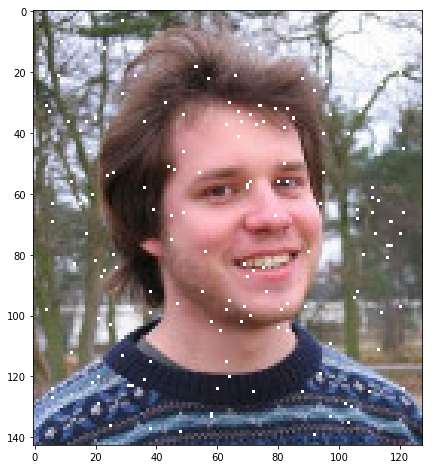

In [53]:
%matplotlib inline
img_matrice = util.read_im("Data/imgdataset/12.jpg")

"""
eau.jpg,
h = 9
alpha=0.1
"""
print("taille de l'image : ", img_matrice.shape)

util.display_im(img_matrice)

#Taille des patchs
h=3 #nombre impair

#noisy_image = delete_rect(img_matrice, 400, 400, 500, 100)
#display_im(noisy_image)

#display_im(img_matrice)

#util.display_im(util.get_patch(50, 50, 4, img_matrice))

width = img_matrice.shape[1]
height = img_matrice.shape[0]

print(width," , ", height)

noisy_image, noise_pixels = util.noise(img_matrice, 0.01, width, height, h)
util.display_im(noisy_image)

for i in range(0, noisy_image.shape[0]):
     for j in range(0, noisy_image.shape[1]):
            print(noisy_image[i][j])
            if(np.array_equal(noisy_image[i][j], np.array([-1, -1, -1]))):
                print("NOISYYY")
                i=noisy_image.shape[0]
                j = noisy_image.shape[1]

_,clear_patches = util.get_patches(img_matrice, h, width, height)
noisy_patches,_ = util.get_all_patches(noisy_image, h,width, height)

#noisy_patches = patches[0]
#clear_patches = patches[1]

#print("New patch : ", convert_patch_into_vector(clear_patches[5]))

nbnoisy = np.shape(noisy_patches)[0]
nbclear = np.shape(clear_patches)[0]

print("nbnoisy:", nbnoisy, ",   nbclear:", nbclear)

util.display_im(noisy_patches[0])
#patch_sans_central, pixel_central = split_patch(noisy_patches[0])
#print(patch_sans_central)
#print(pixel_central)


In [4]:
training = convert_patches_into_training_set(clear_patches)
print(training.shape)

#for patch in clear_patches:
#    util.display_im(patch)

(147, 239)


/users/Etu7/3262287/.local/lib/python3.4/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha =  644.804642083
0  /  152
Correction de x :  8  et y :  113
label = 
--- lasso regression ---
  (0, 1)	0.0731744575755
coef shape :  (1, 239)
nb patch not at zero:  1  /  239
dictionary shape :  (147, 239)
sum(normalized_coefs) =  [ 1.]
coef*dictionary shape=  (147, 239)
sum(normalized_coefs*dictionary,axis=1) shape=  (147,)
patch shape: (147,)
len(patch) :  147
centre =  72
nouveau pixel :  [80, 84, 93]

1  /  152
Correction de x :  89  et y :  51
label = 
--- lasso regression ---
  (0, 93)	0.218353778184
  (0, 137)	0.00902807271325
coef shape :  (1, 239)
nb patch not at zero:  2  /  239
dictionary shape :  (147, 239)
sum(normalized_coefs) =  [ 1.]
coef*dictionary shape=  (147, 239)
sum(normalized_coefs*dictionary,axis=1) shape=  (147,)
patch shape: (147,)
len(patch) :  147
centre =  72
nouveau pixel :  [157, 98, 92]

2  /  152
Correction de x :  89  et y :  47
label = 
--- lasso regression ---
  (0, 70)	0.0860565213353
  (0, 104)	0.023023851352
  (0, 129)	0.226501223001
coef s

/usr/local/lib/python3.4/dist-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


--- lasso regression ---
  (0, 94)	0.0728770701485
  (0, 127)	0.236093032443
coef shape :  (1, 239)
nb patch not at zero:  2  /  239
dictionary shape :  (147, 239)
sum(normalized_coefs) =  [ 1.]
coef*dictionary shape=  (147, 239)
sum(normalized_coefs*dictionary,axis=1) shape=  (147,)
patch shape: (147,)
len(patch) :  147
centre =  72
nouveau pixel :  [183, 116, 116]

25  /  152
Correction de x :  42  et y :  105
label = 
--- lasso regression ---
  (0, 62)	0.000914120149751
  (0, 75)	0.23776687479
  (0, 76)	0.130446682287
  (0, 102)	0.0104785297331
  (0, 178)	0.130959774689
  (0, 199)	0.334486417718
coef shape :  (1, 239)
nb patch not at zero:  6  /  239
dictionary shape :  (147, 239)
sum(normalized_coefs) =  [ 1.]
coef*dictionary shape=  (147, 239)
sum(normalized_coefs*dictionary,axis=1) shape=  (147,)
patch shape: (147,)
len(patch) :  147
centre =  72
nouveau pixel :  [113, 116, 133]

26  /  152
Correction de x :  118  et y :  77
label = 
--- lasso regression ---
  (0, 1)	0.0203853716

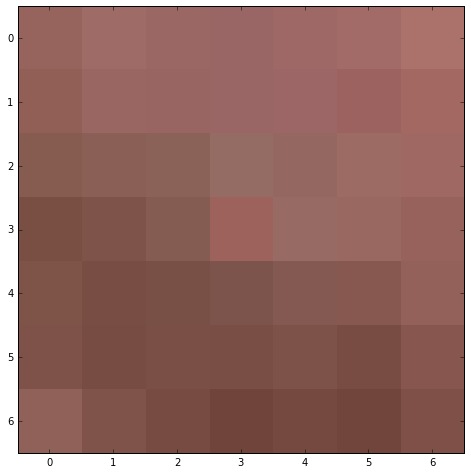

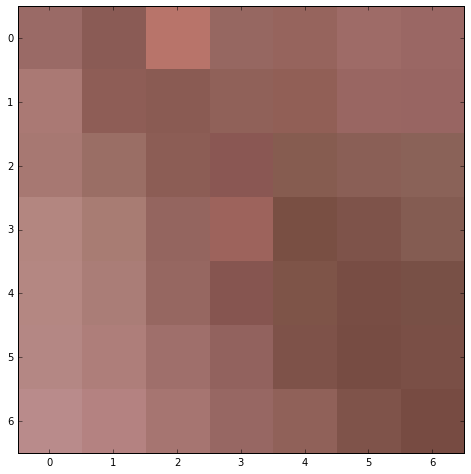

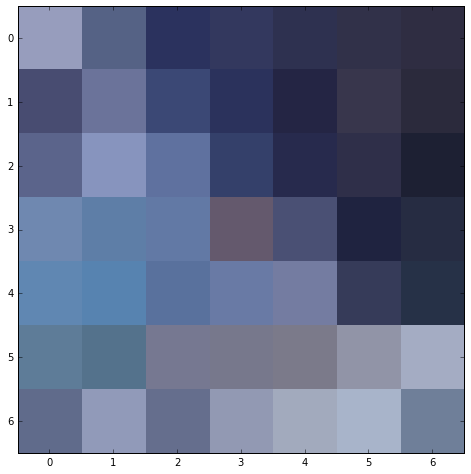

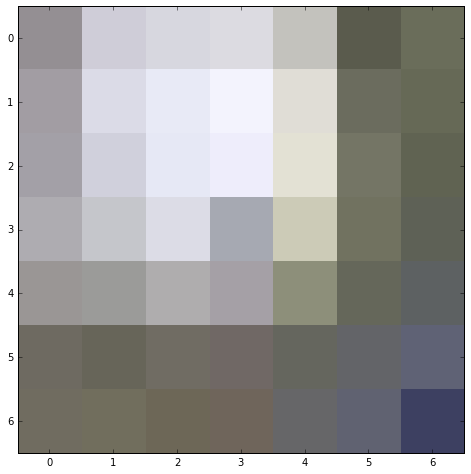

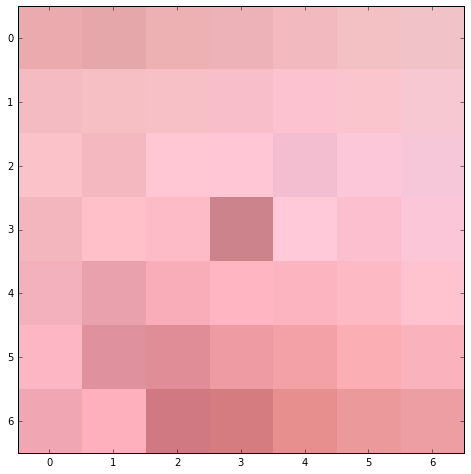

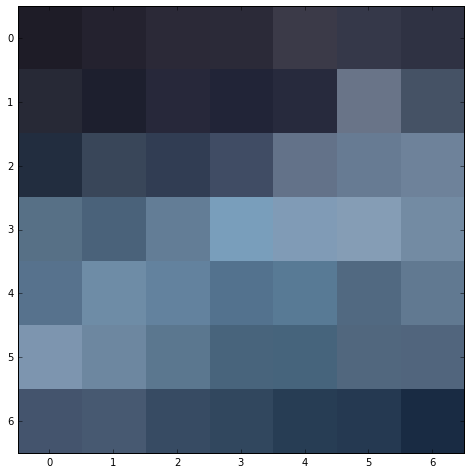

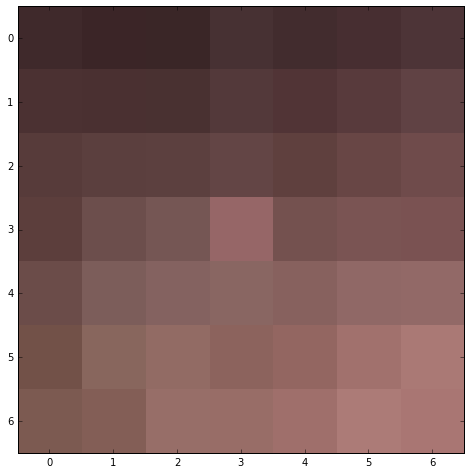

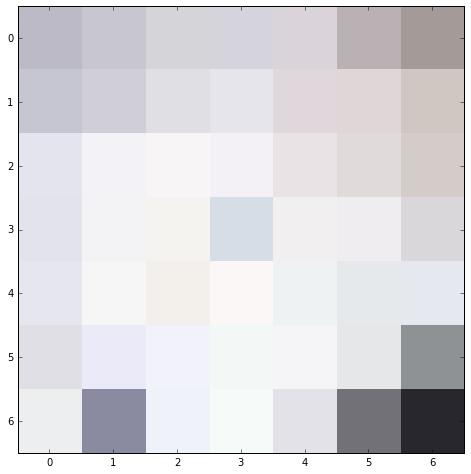

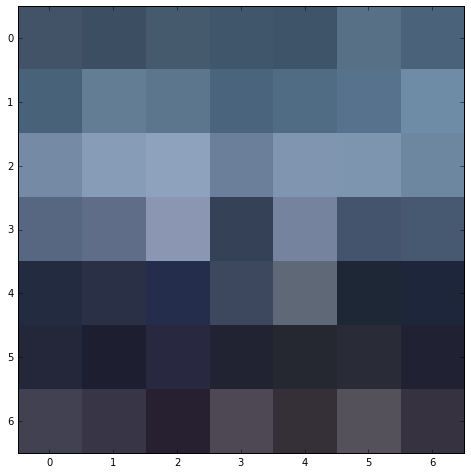

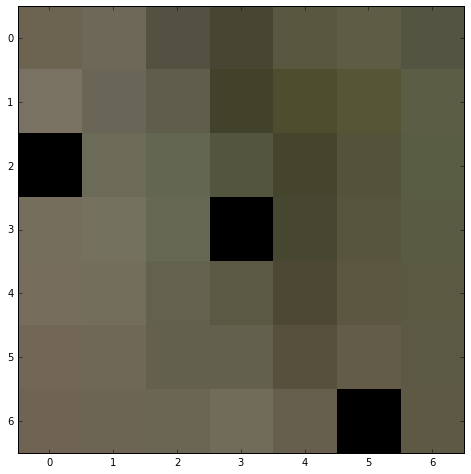

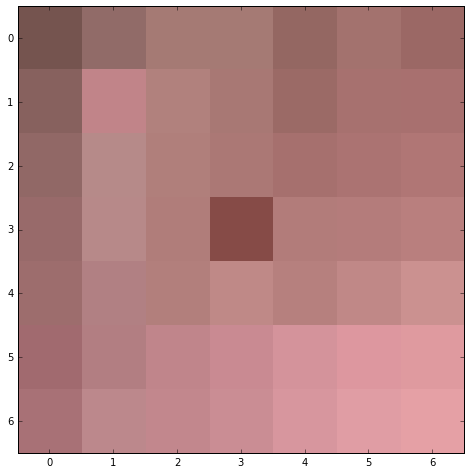

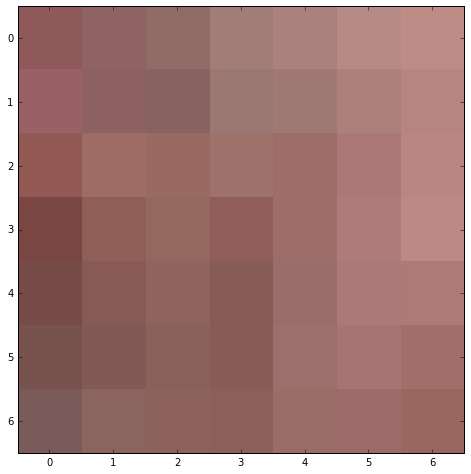

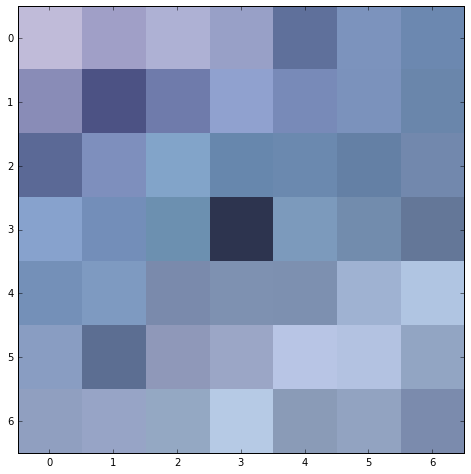

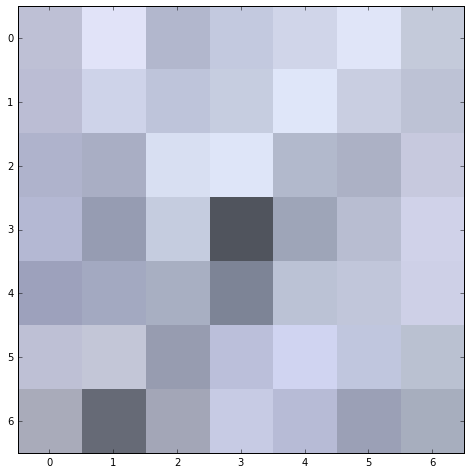

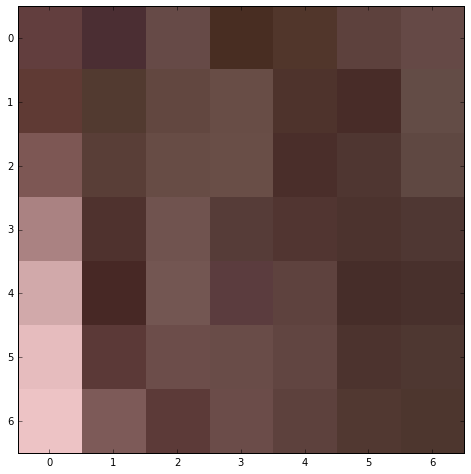

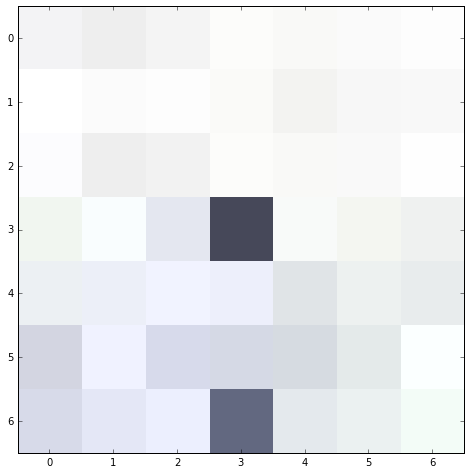

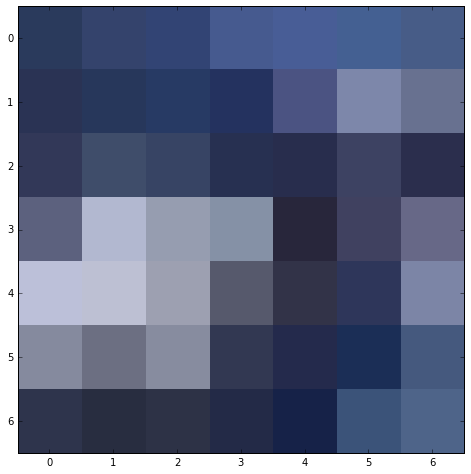

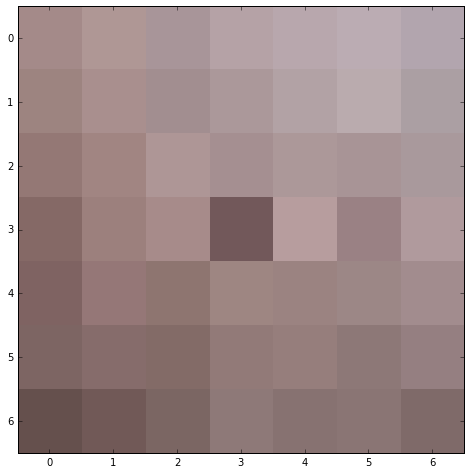

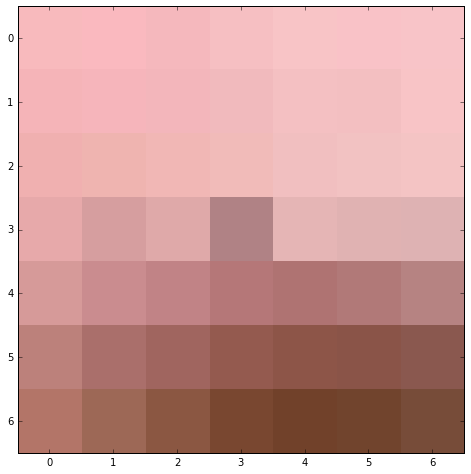

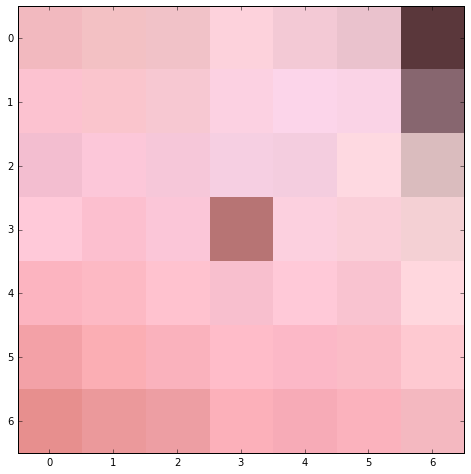

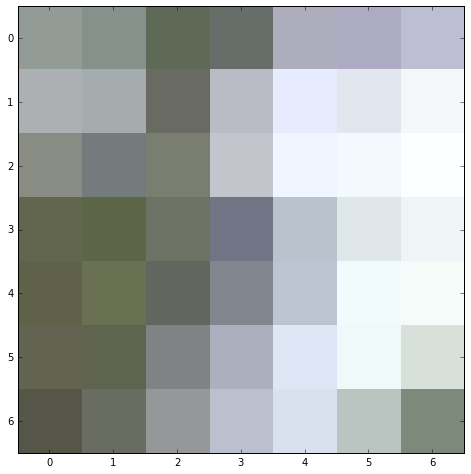

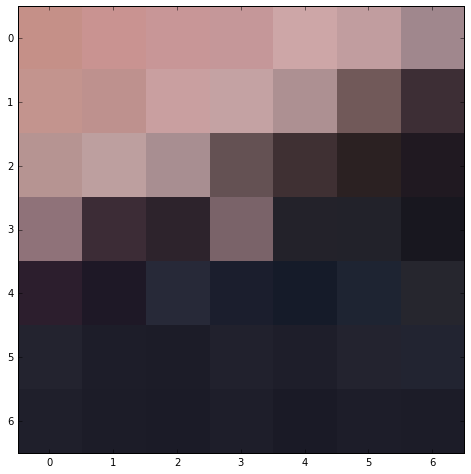

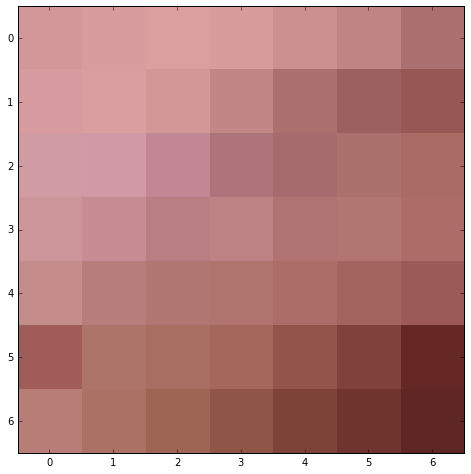

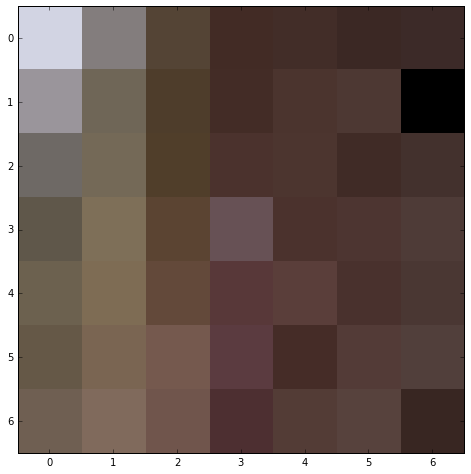

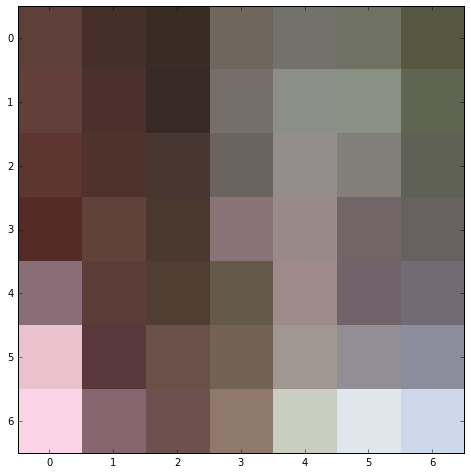

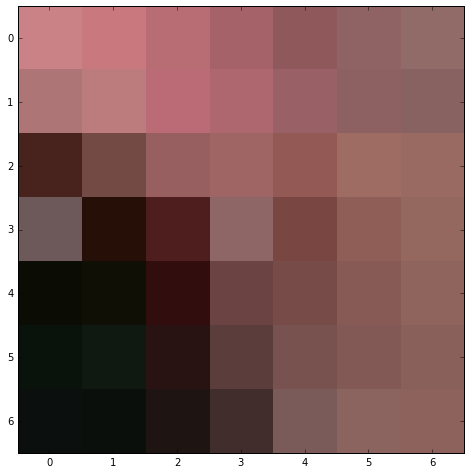

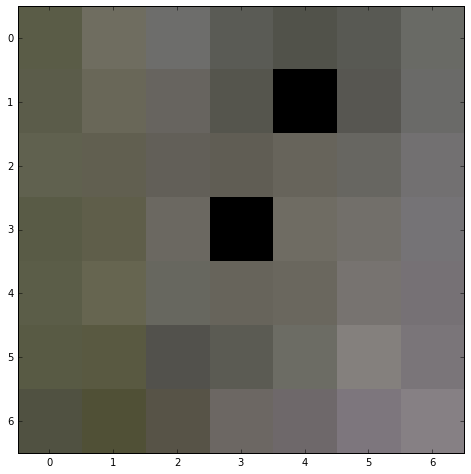

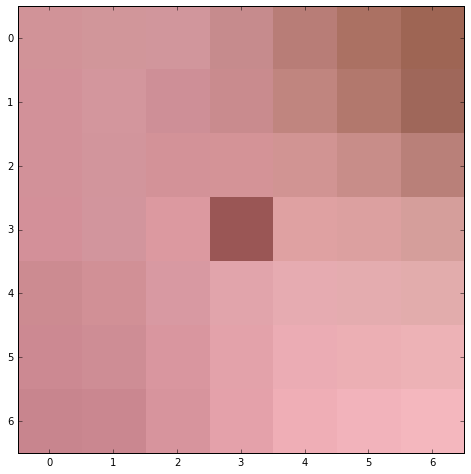

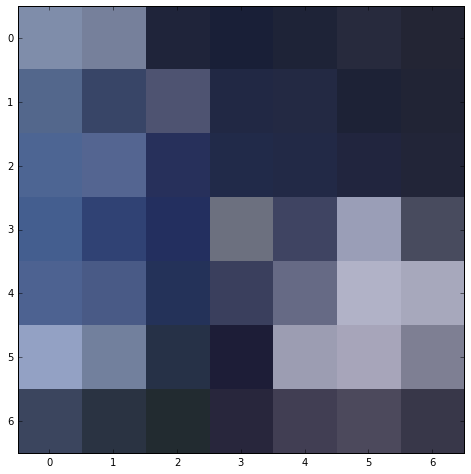

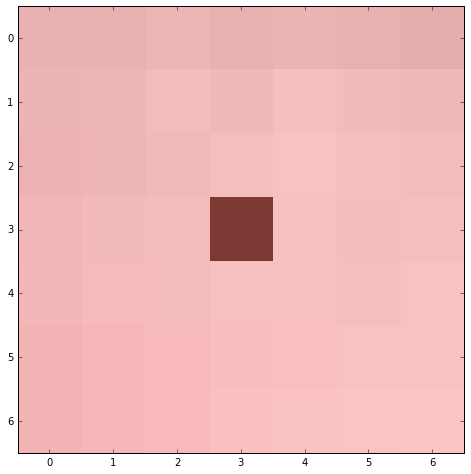

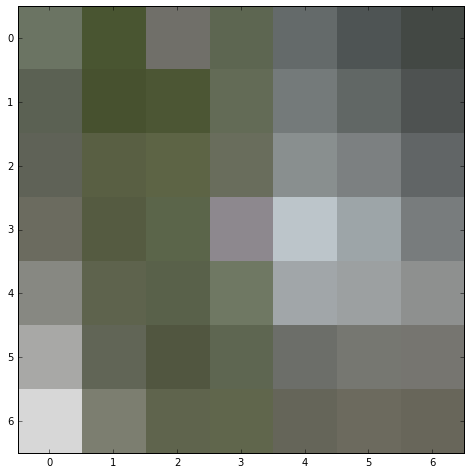

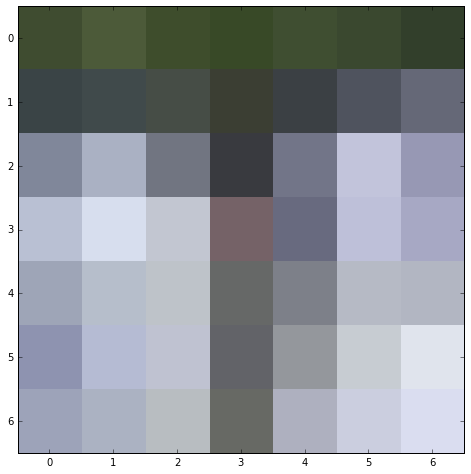

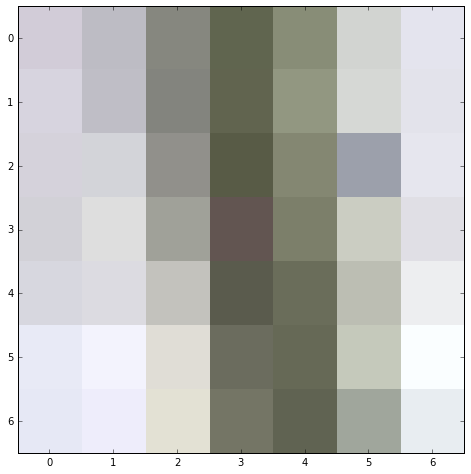

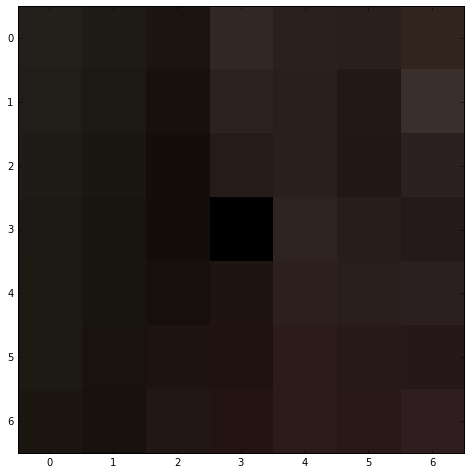

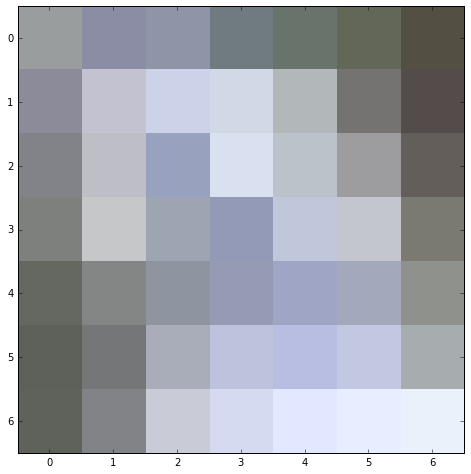

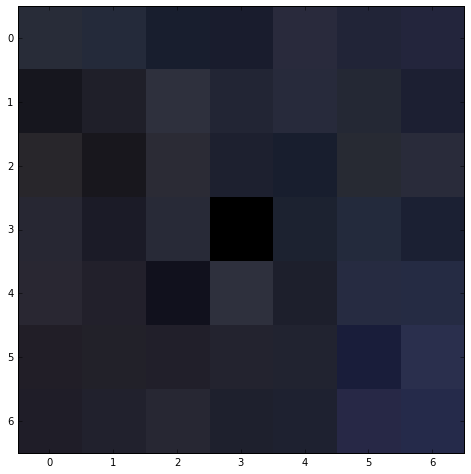

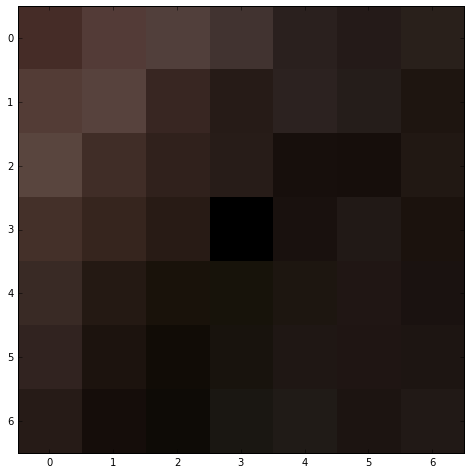

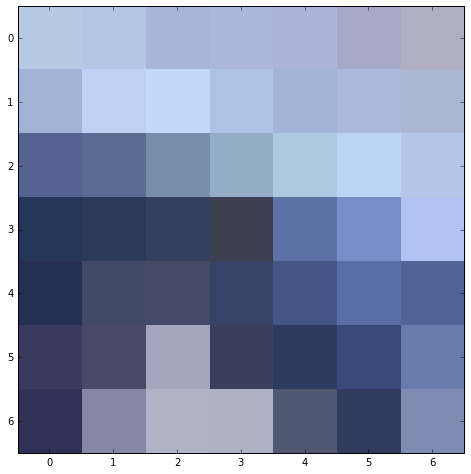

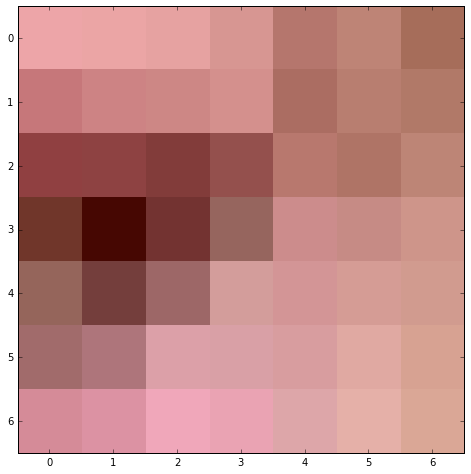

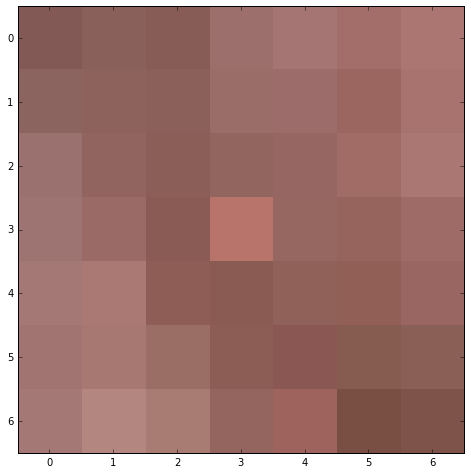

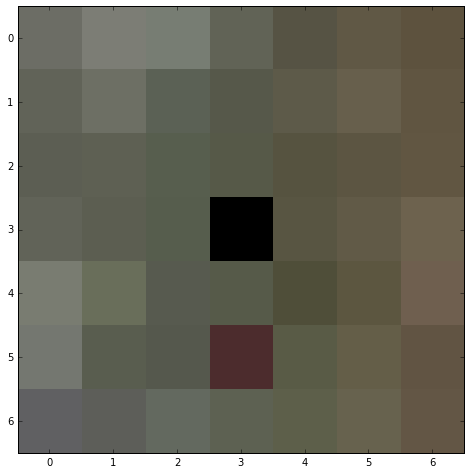

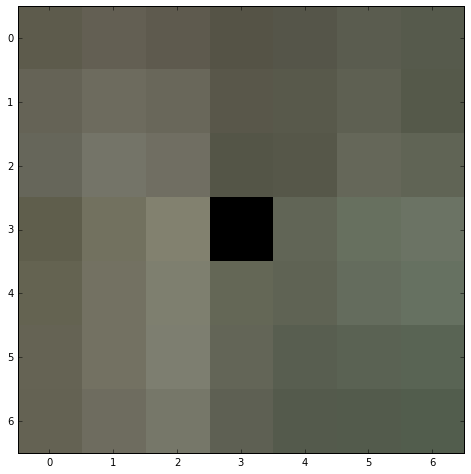

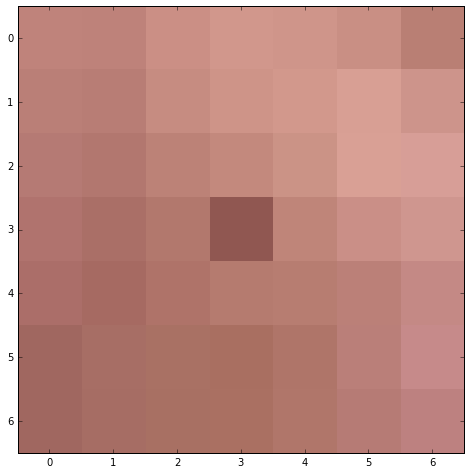

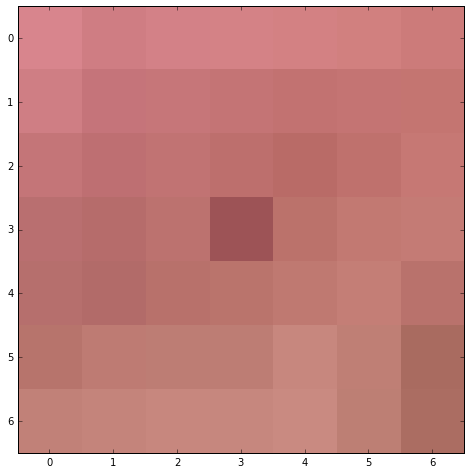

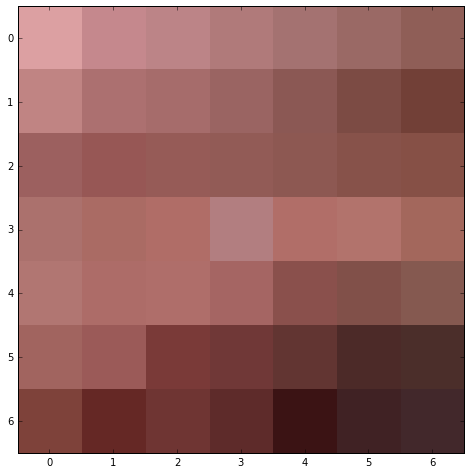

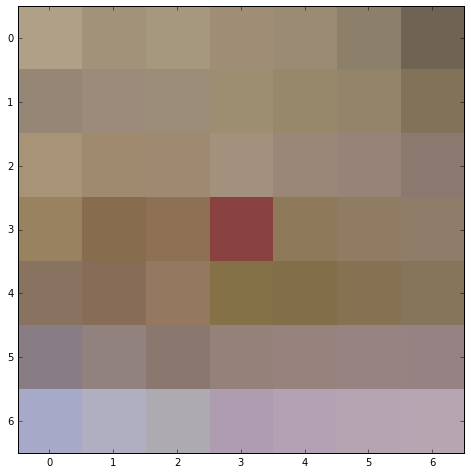

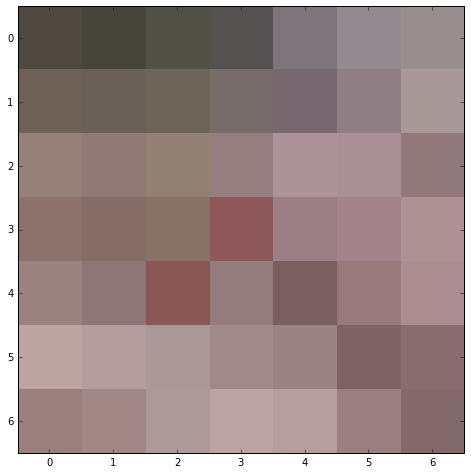

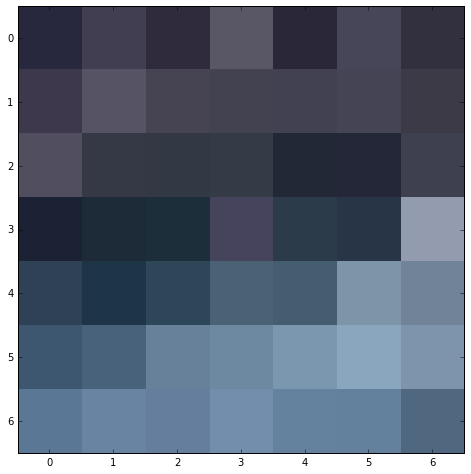

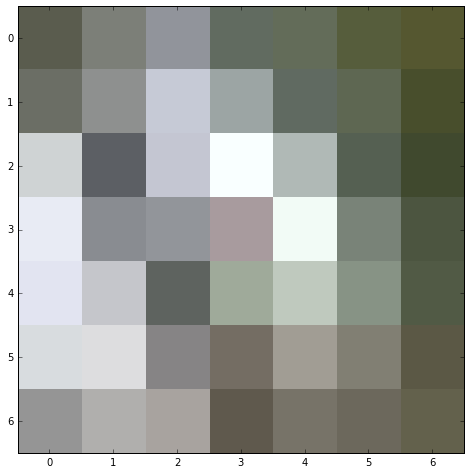

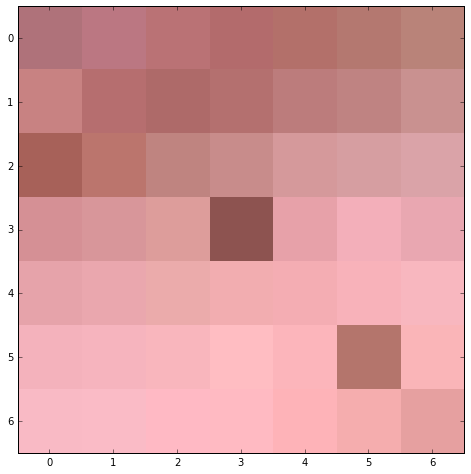

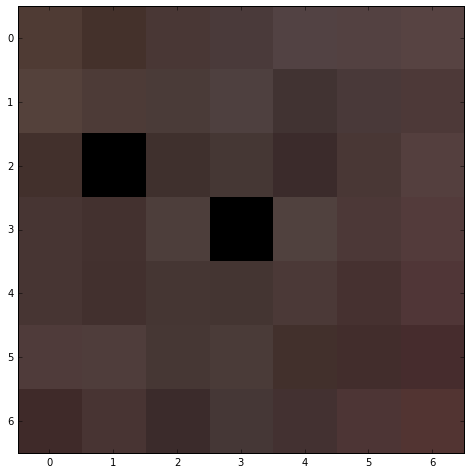

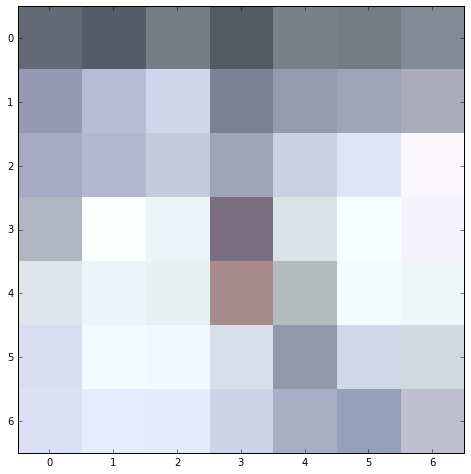

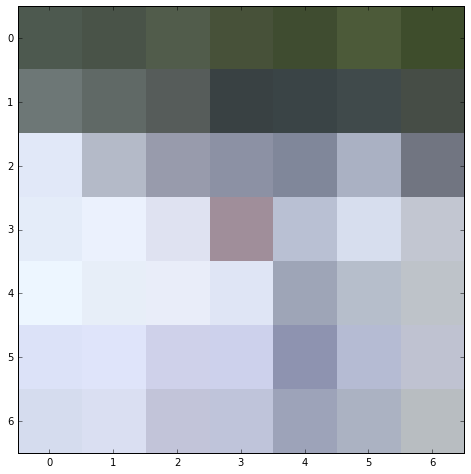

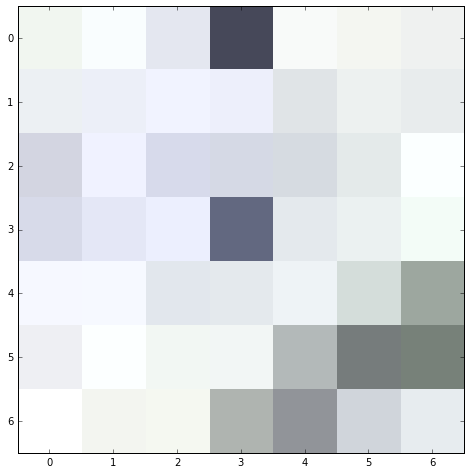

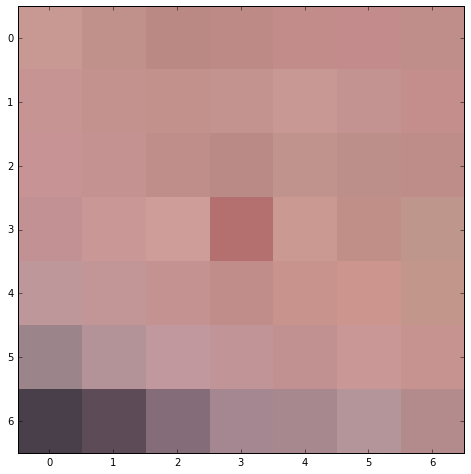

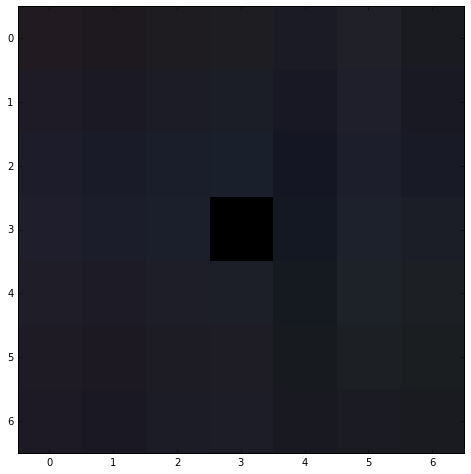

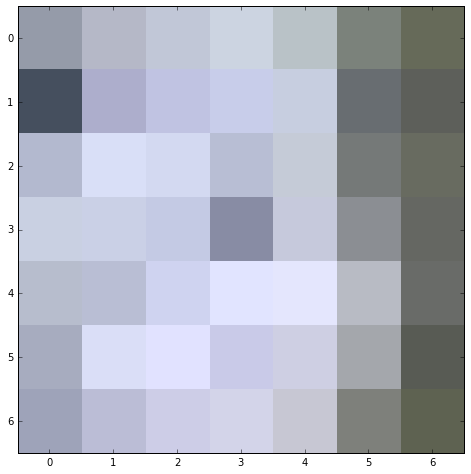

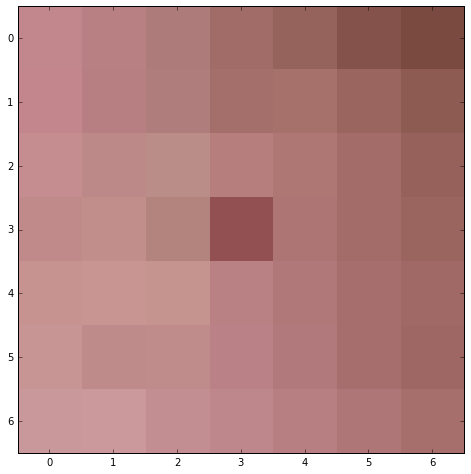

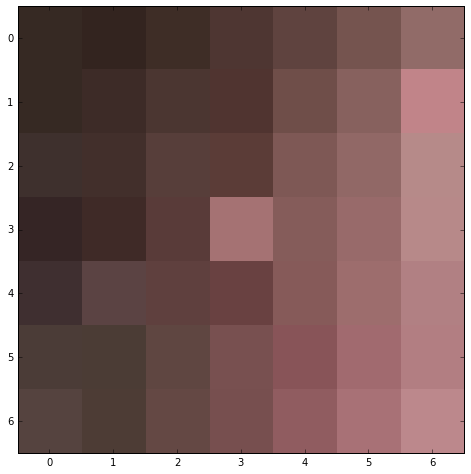

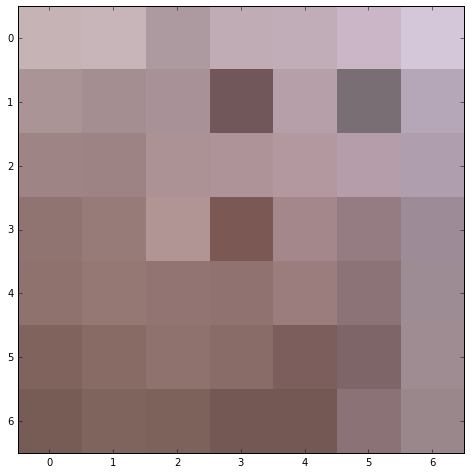

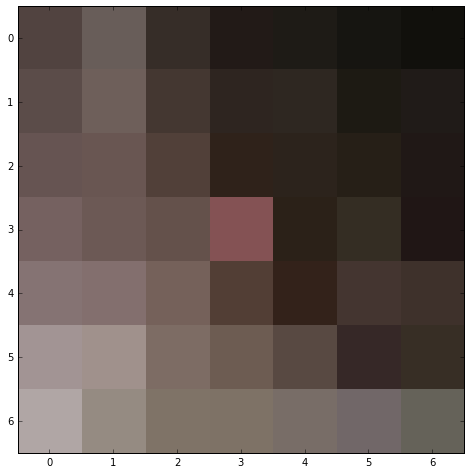

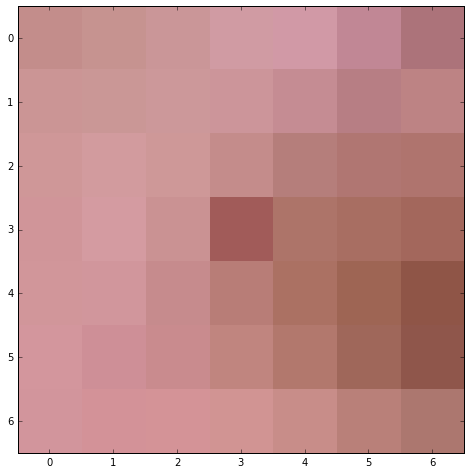

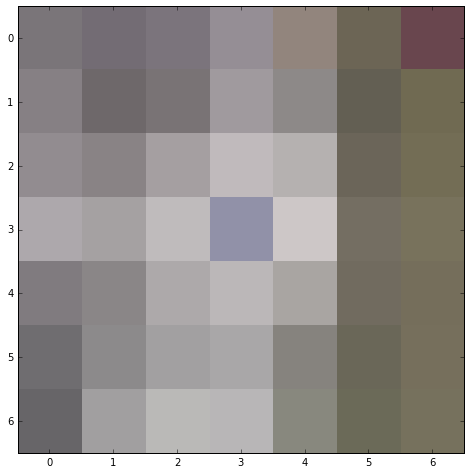

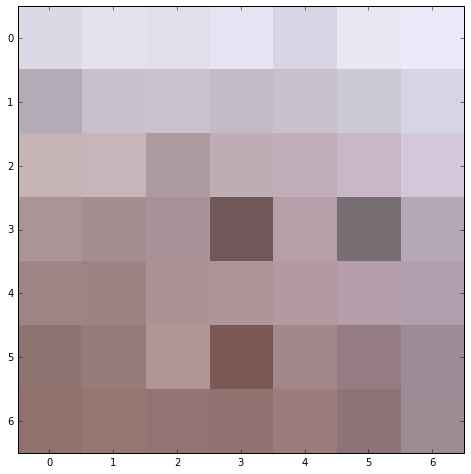

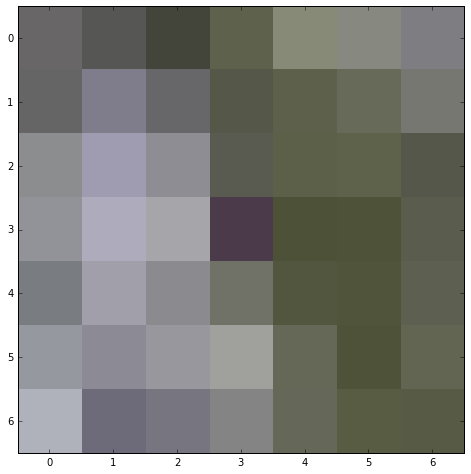

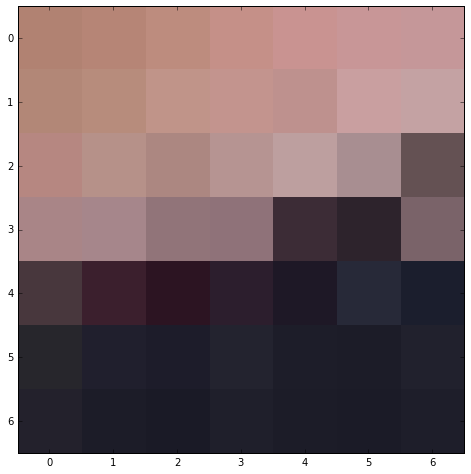

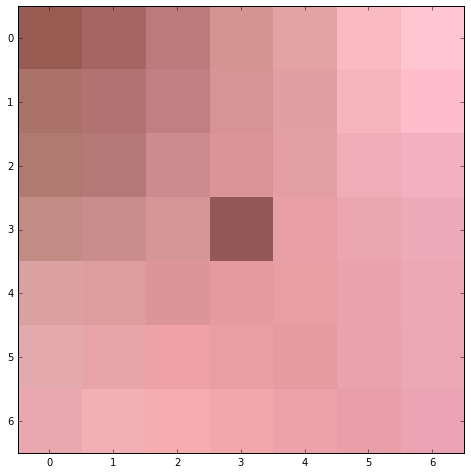

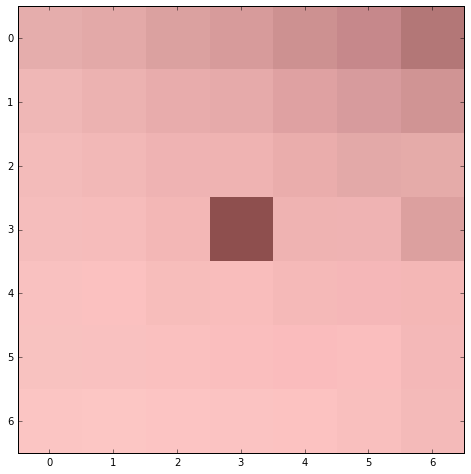

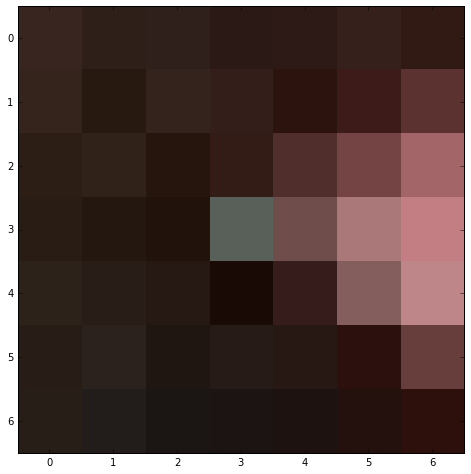

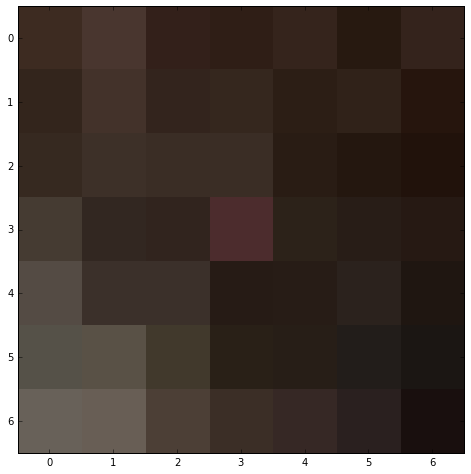

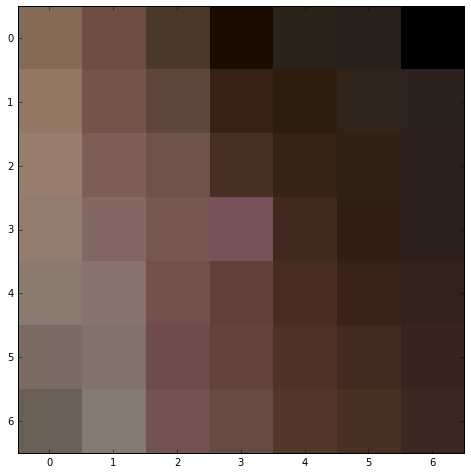

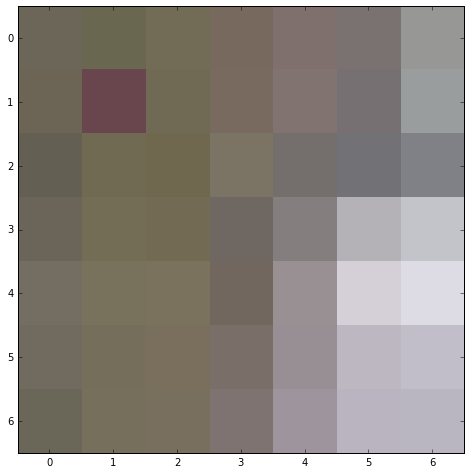

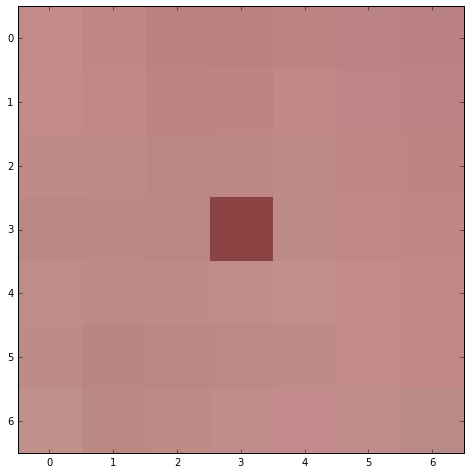

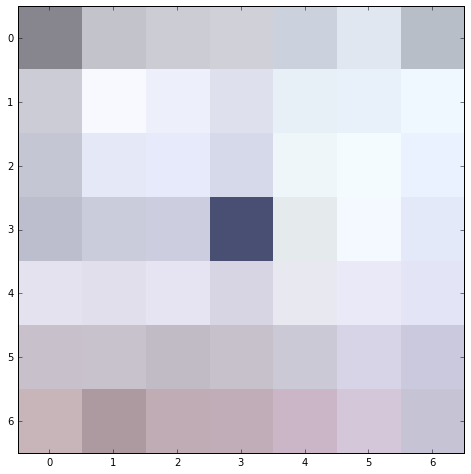

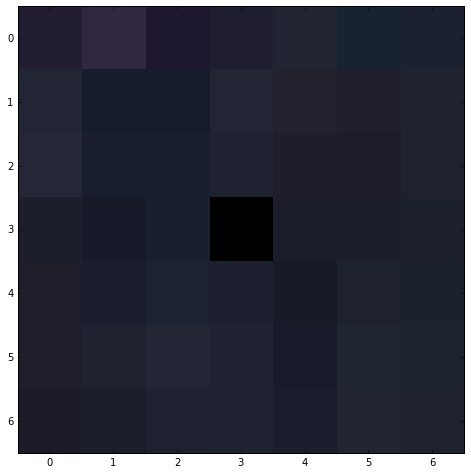

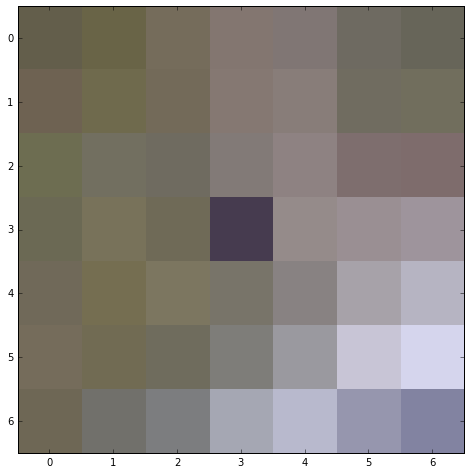

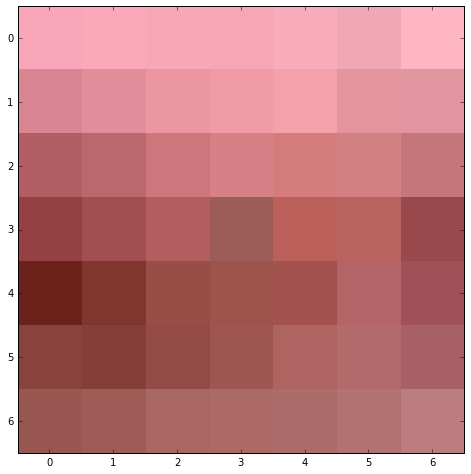

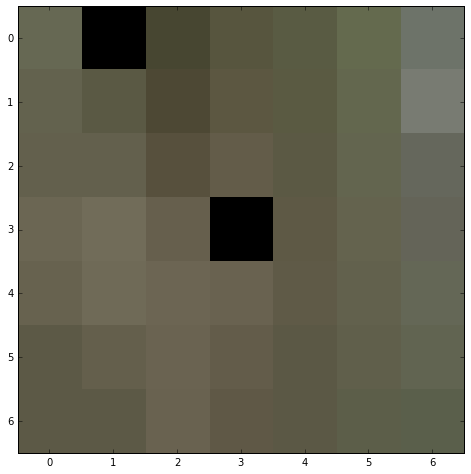

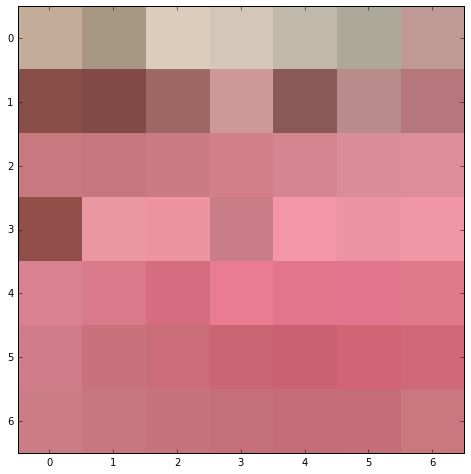

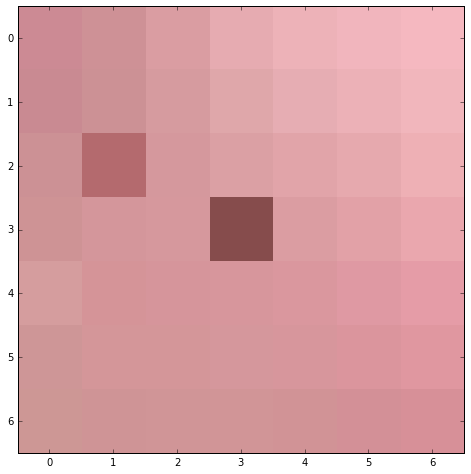

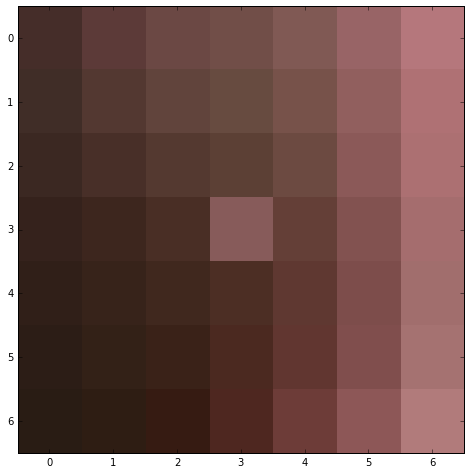

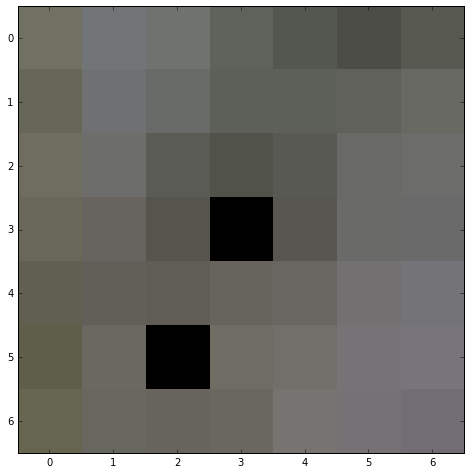

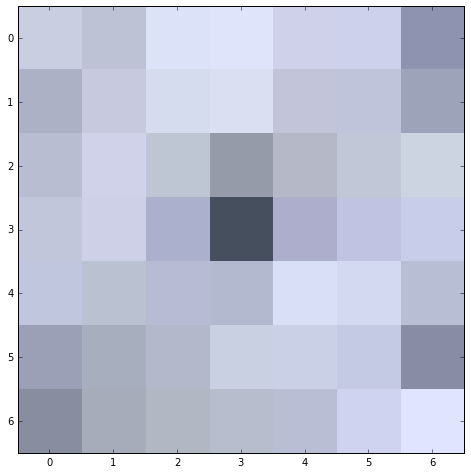

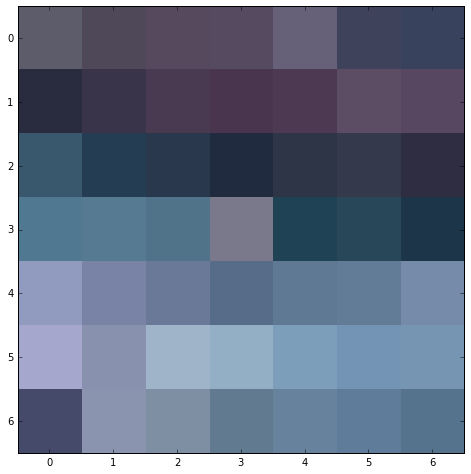

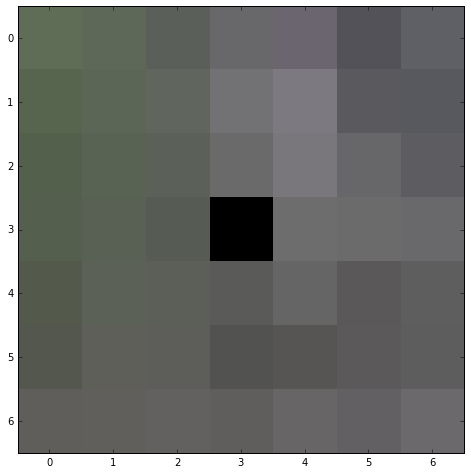

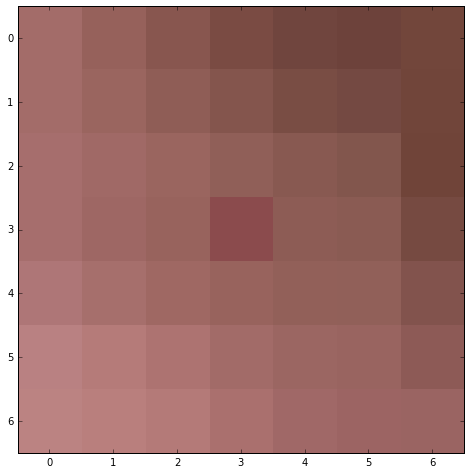

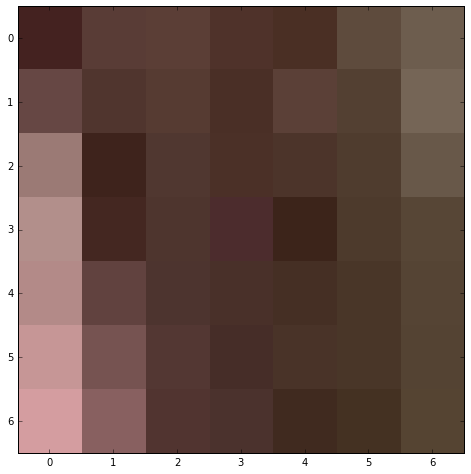

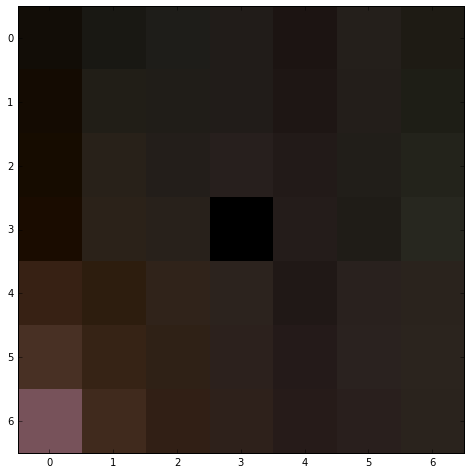

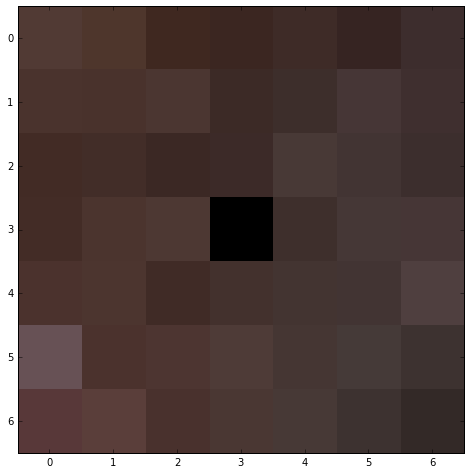

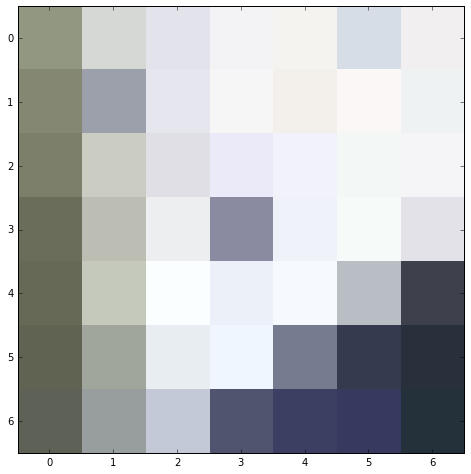

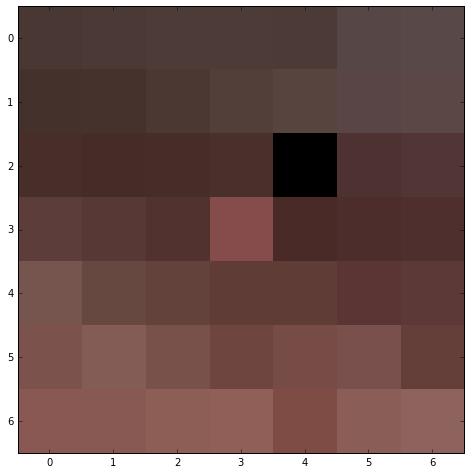

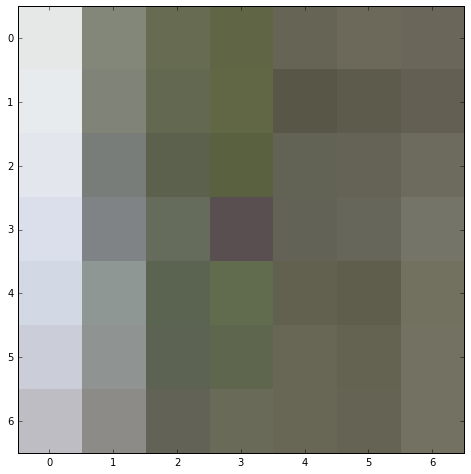

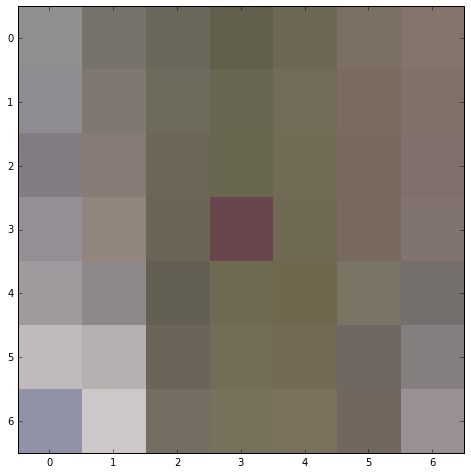

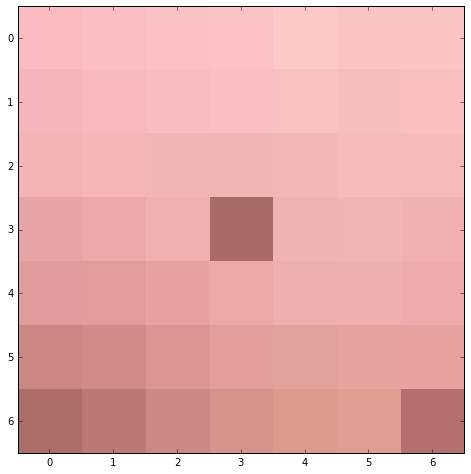

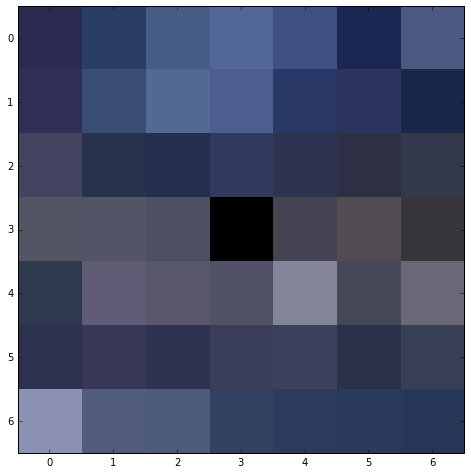

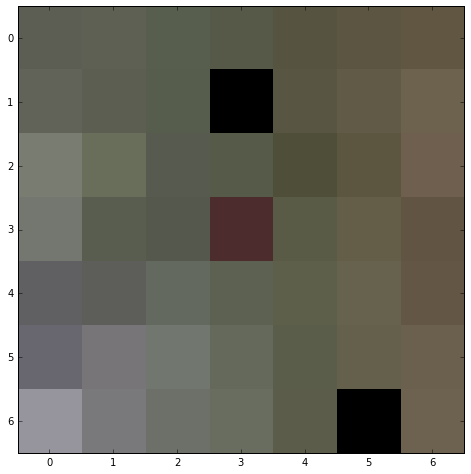

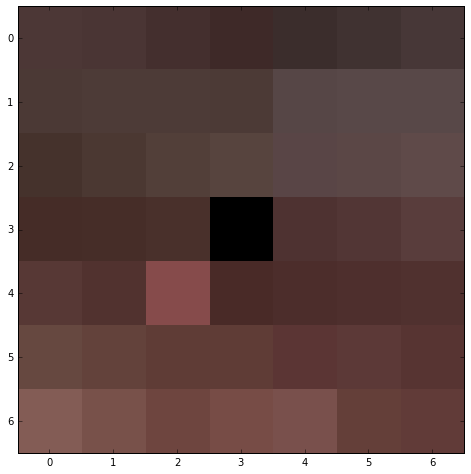

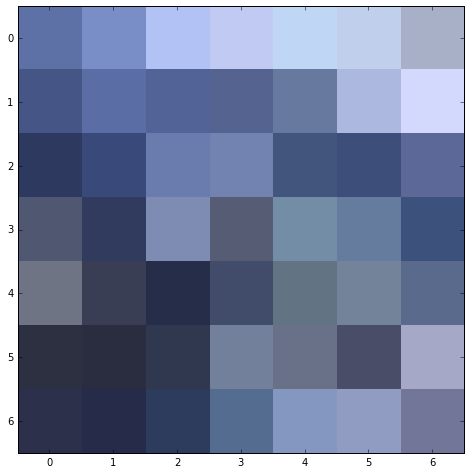

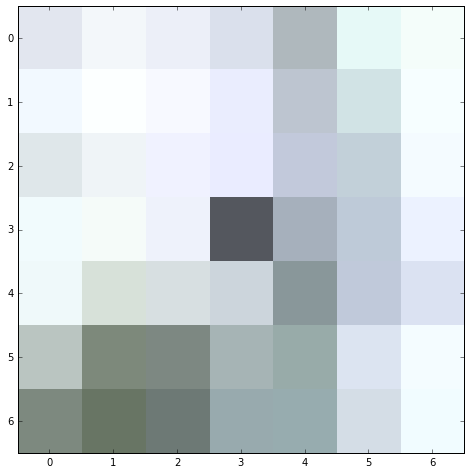

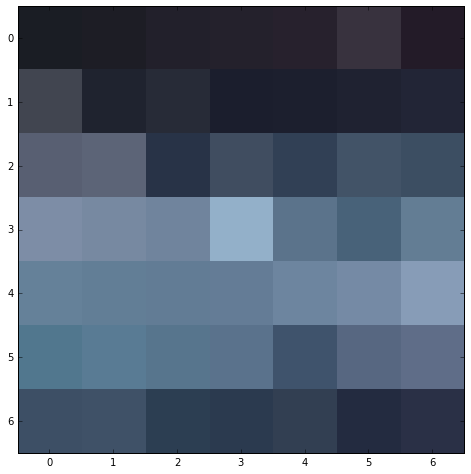

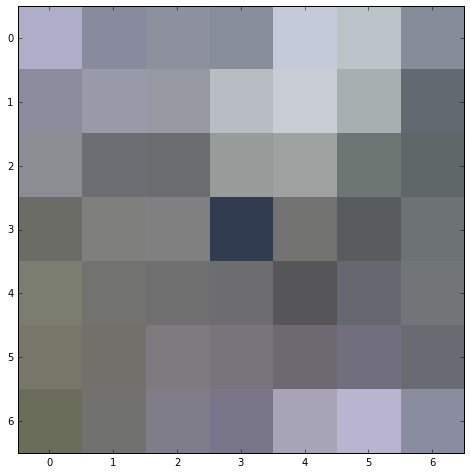

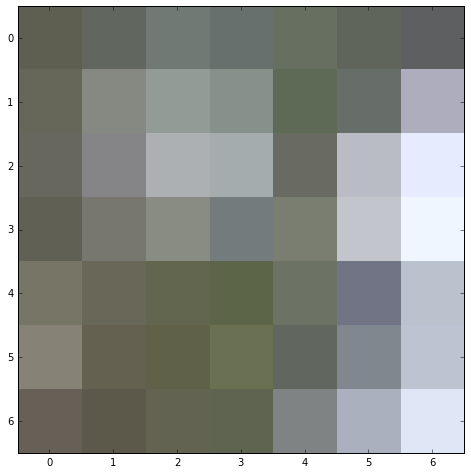

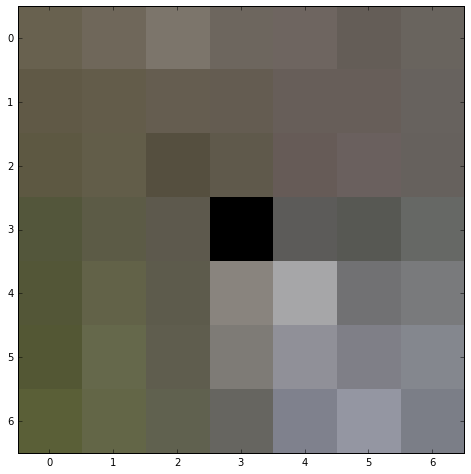

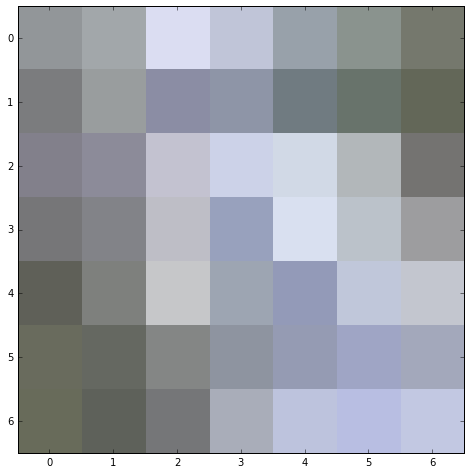

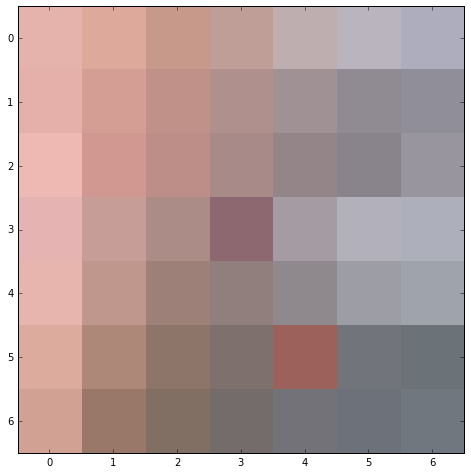

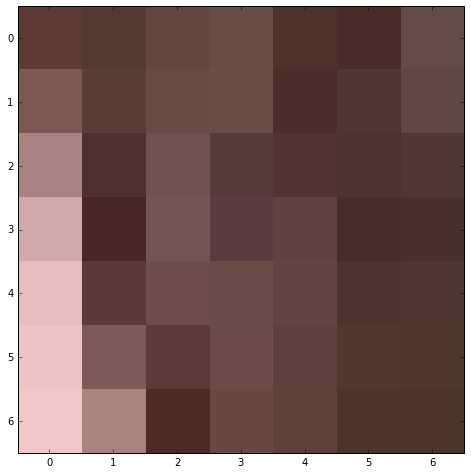

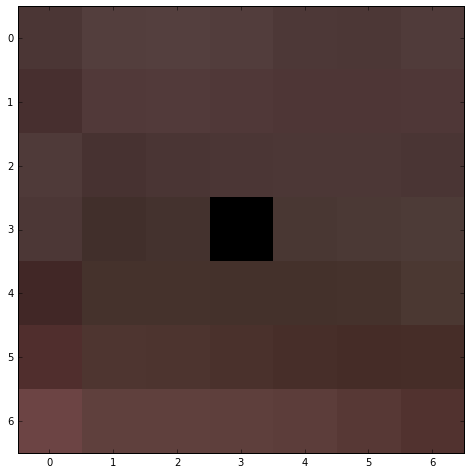

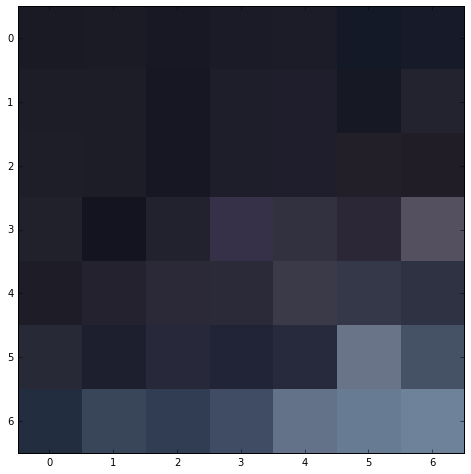

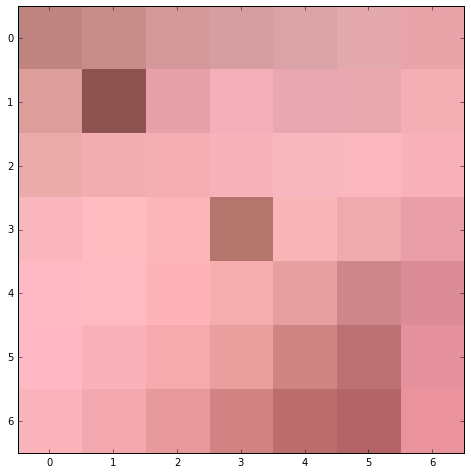

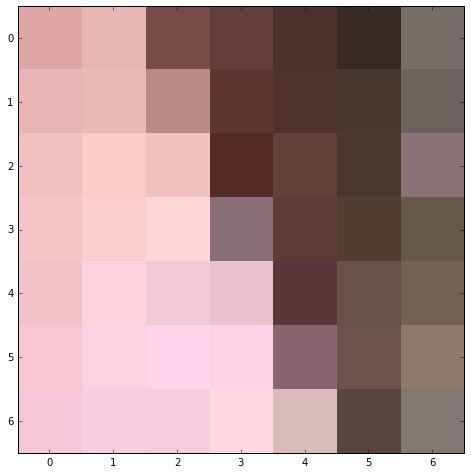

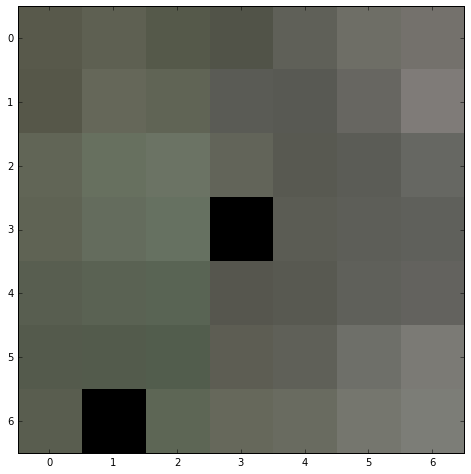

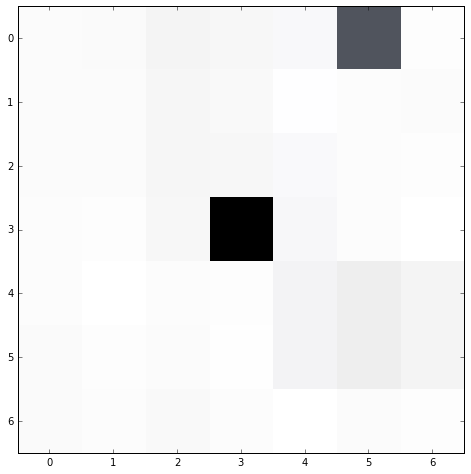

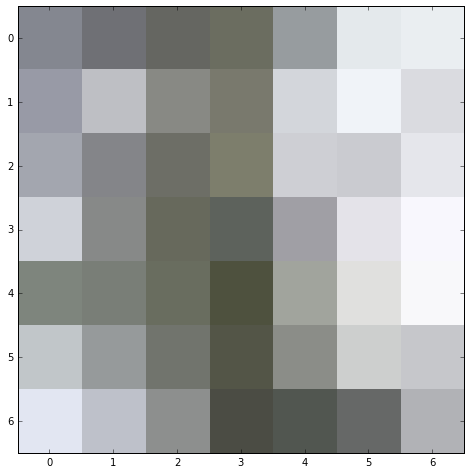

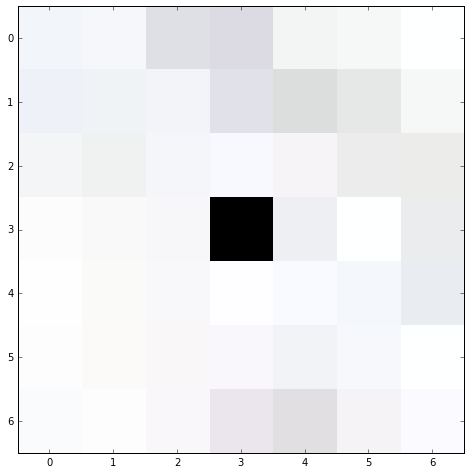

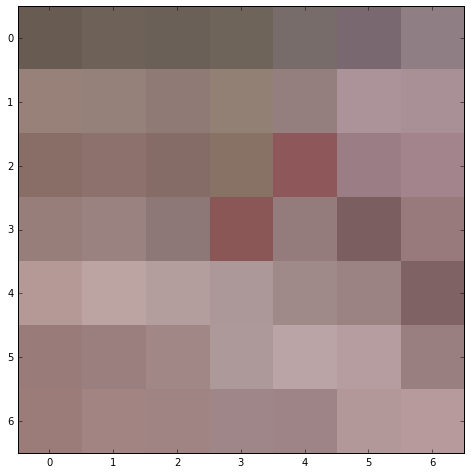

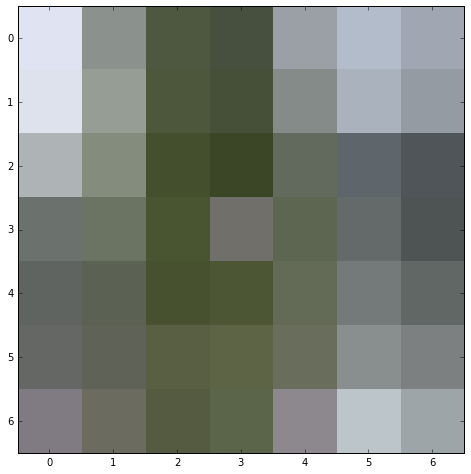

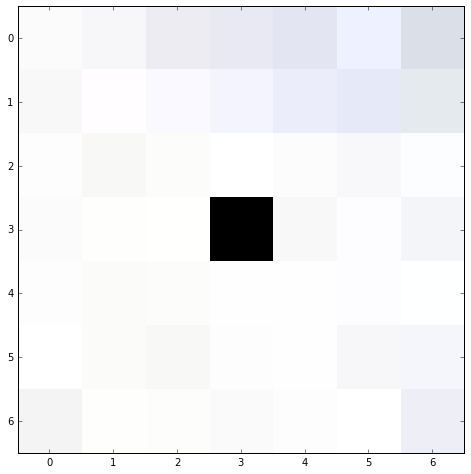

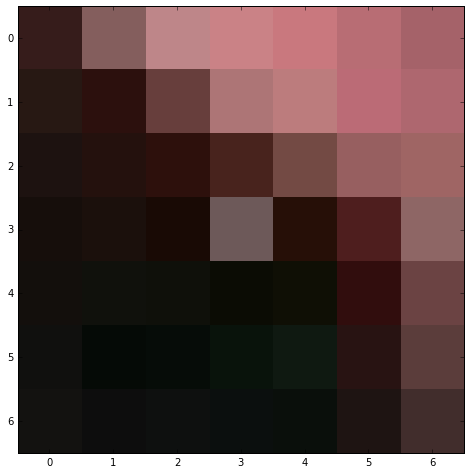

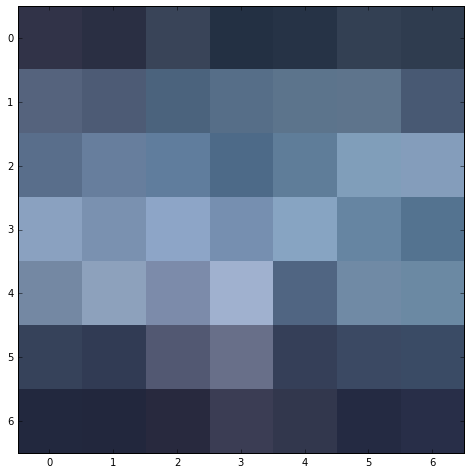

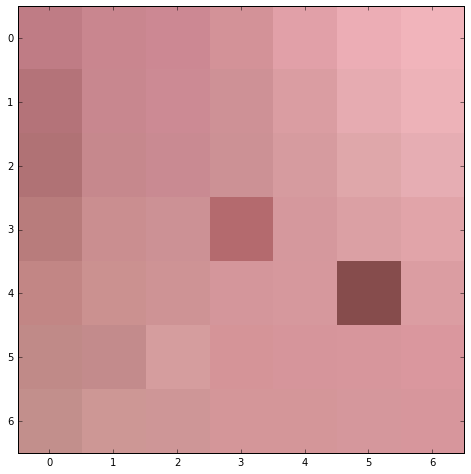

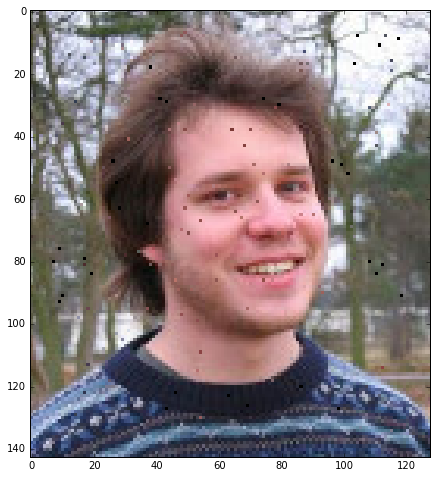

In [5]:
inpaint_image(noisy_image, training, noise_pixels, h)

In [6]:
util.display_im(clear_patches[292])

IndexError: list index out of range